<a href="https://colab.research.google.com/github/kanishkagargg/Retail-Sales-Prediction-Capstone/blob/main/Retail_Sales_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

The project titled "Retail Sales Prediction" aims to leverage machine learning techniques to forecast sales in retail stores based on a comprehensive dataset. The dataset encompasses various parameters, including store type, assortment, sales, customer footfall, date, competition distance, promotional activities, and state or school holidays.

##Objective:

The primary goal of the project is to develop an accurate and reliable model for predicting retail sales. This predictive capability can empower retailers to optimize inventory, staffing, and promotional strategies, leading to improved overall business performance.

##Key Data Columns:

The dataset contains essential columns such as store type, assortment, sales, customer footfall, date, competition distance, promo status, and information on state or school holidays. These variables will be crucial in understanding the factors influencing retail sales and building an effective predictive model.

##Data Exploration and Preprocessing:

Before feeding the data into machine learning models, a thorough Exploratory Data Analysis (EDA) will be conducted. This involves understanding the characteristics of the dataset, identifying patterns, outliers, and relationships between variables. Visualizations will play a crucial role in gaining insights into the data distribution and trends. The data preprocessing phase will handle missing values, outliers, and ensure that the dataset is in a suitable format for modeling. Feature engineering will involve creating new features or transforming existing ones to enhance the model's predictive capabilities.

##Machine Learning Models:

The prepared data will be fed into several machine learning models, including Linear Regression, Random Forest, XGBoost, and Gradient Boosting. Each model offers unique advantages in capturing different aspects of the data. The variety of models aims to ensure flexibility and robustness in predicting retail sales. Hyperparameter tuning will be employed to optimize the performance of these models, enhancing their accuracy and generalization capabilities.

##Model Comparison and Selection:

After training the machine learning models, their performance will be evaluated using relevant metrics. This evaluation will enable a comparison of the models to identify the one that best suits the specific requirements of the retail sales prediction task. The chosen model will be the one demonstrating the highest accuracy and reliability in predicting sales based on the given dataset.

# **GitHub Link -**

https://github.com/kanishkagargg/Retail-Sales-Prediction-Capstone/blob/main/Sample_ML_Submission_Template.ipynb

# **Problem Statement**



Rossmann oversees a network of more than 3,000 drug stores across seven European countries. Presently, the managers of Rossmann stores face the challenge of anticipating their daily sales for an upcoming six-week period. Various factors, such as promotions, competition, school and state holidays, seasonality, and locality, contribute to the dynamics influencing store sales. Given the diverse circumstances surrounding each store manager, the accuracy of sales predictions can exhibit significant variability. The project entails utilizing historical sales data from 1,115 Rossmann stores to forecast the 'Sales' column for the test set.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.2 MB/s eta 0:00:00


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from math import sqrt
import scipy.stats as stats
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import LinearRegression
import category_encoders as ce
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso

### Dataset Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Dataset
Store_Data = pd.read_csv('/content/drive/MyDrive/Capstone_Project_6/store.csv',encoding="ISO-8859-1")

In [5]:
Sales_Data = pd.read_csv('/content/drive/MyDrive/Capstone_Project_6/Rossmann Stores Data.csv',encoding="ISO-8859-1")

<ipython-input-5-2e2bb299930f>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  Sales_Data = pd.read_csv('/content/drive/MyDrive/Capstone_Project_6/Rossmann Stores Data.csv',encoding="ISO-8859-1")


### Dataset First View

In [6]:
# Dataset First Look
Store_Data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
Sales_Data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
Store_Data.shape

(1115, 10)

In [9]:
Sales_Data.shape

(1017209, 9)

### Dataset Information

In [10]:
# Dataset Info
Store_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [11]:
Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count
len(Store_Data[Store_Data.duplicated()])

0

In [13]:
len(Sales_Data[Sales_Data.duplicated()])

0

#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count
Store_Data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [15]:
Sales_Data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

<Axes: >

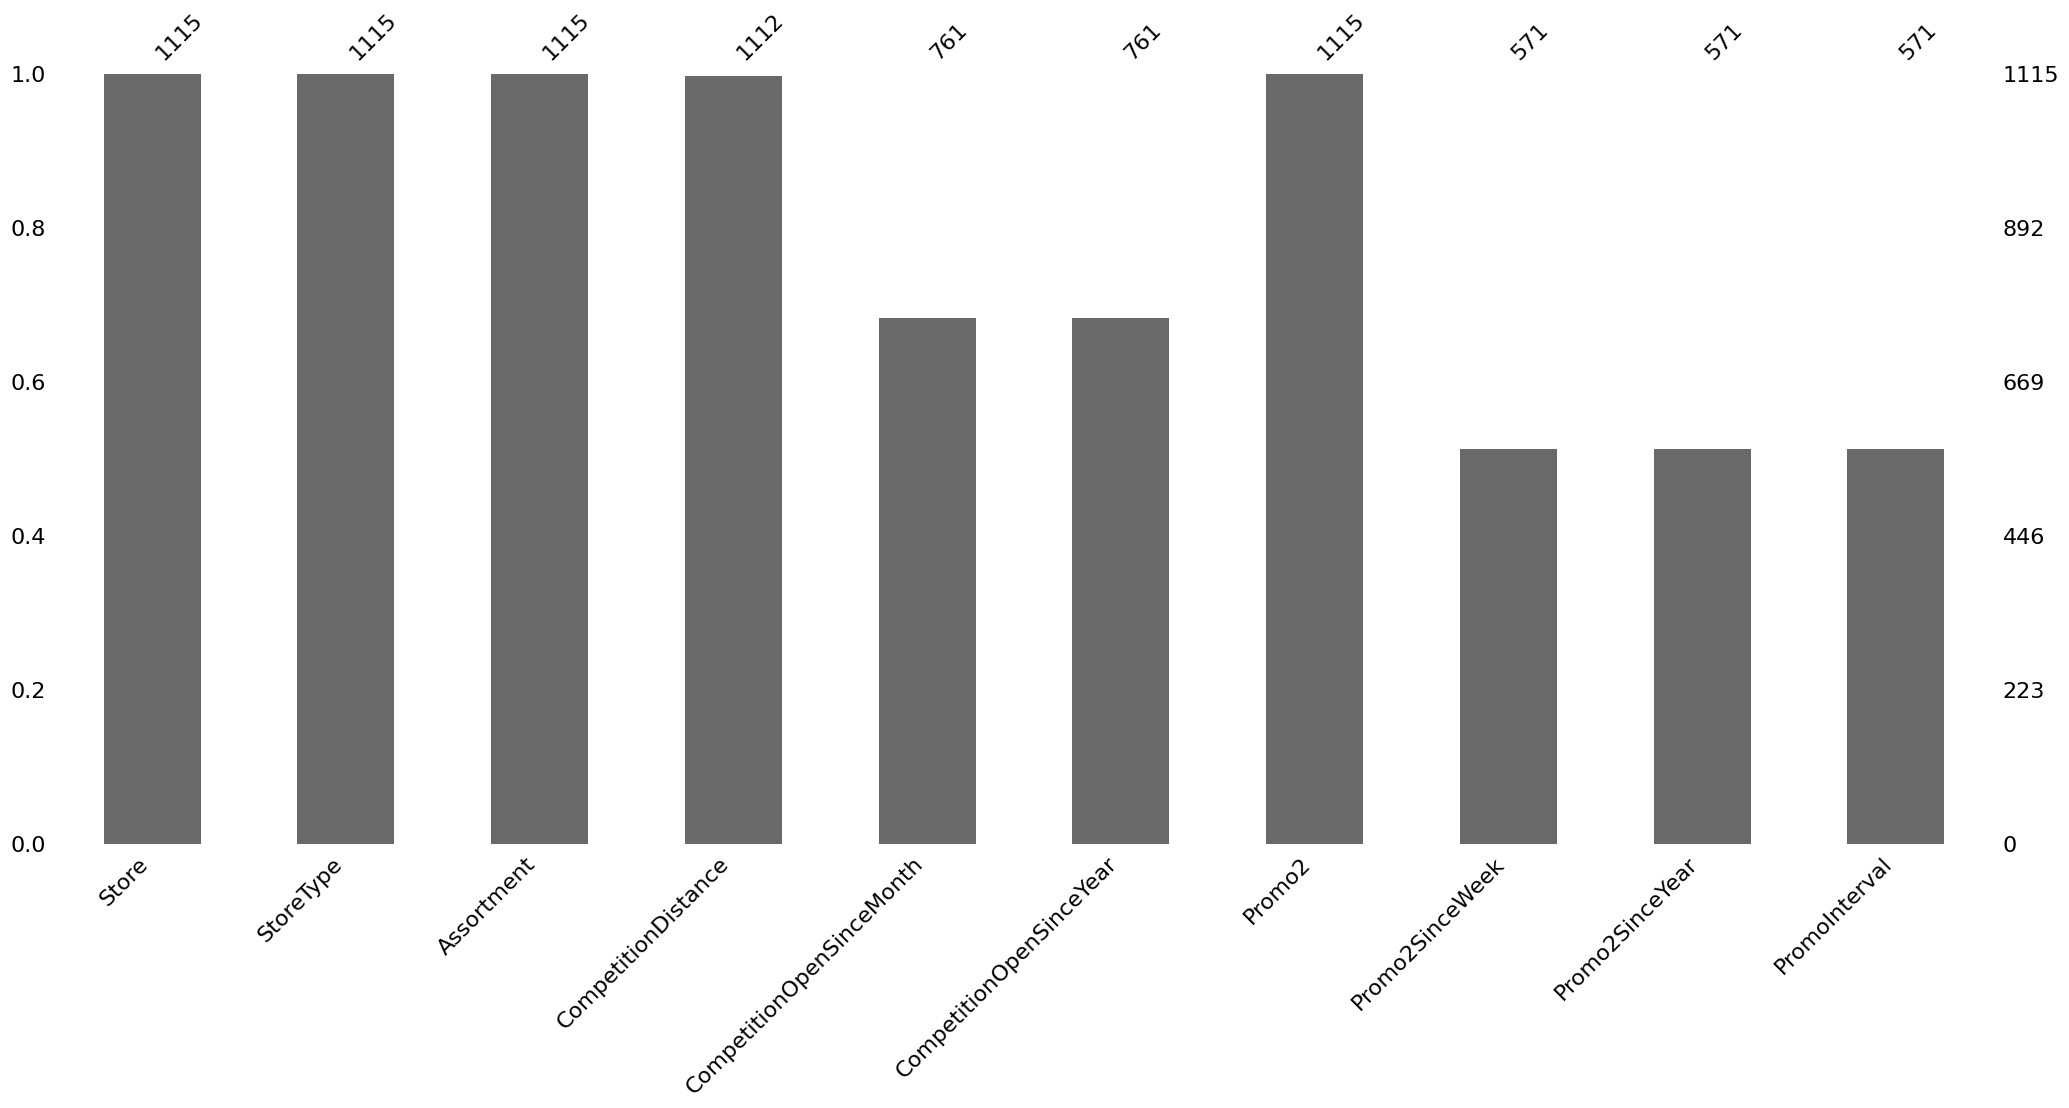

In [16]:
# Visualizing the missing values
msno.bar(Store_Data)

### What did you know about your dataset?

####Data Size and Structure:

The store data comprises 1,115 rows and 10 columns.
Sales data is extensive, with 1,017,209 rows and 9 columns.

####Variables Data types:

Key object columns in the dataset include store type, assortment, promo interval, date, and state holiday.
The remaining columns are predominantly of integer or float data types.

####Data Integrity:

No duplicate rows are present in the dataset, ensuring data integrity and eliminating redundancy.

####Missing Values:

Within the store data, approximately 6 columns exhibit missing values.
Notably, the 'competition distance' column has only 3 missing values, presenting an opportunity for effective treatment.

## ***2. Understanding Your Variables***

In [17]:
# Dataset Columns
Store_Data.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [18]:
Sales_Data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [19]:
# Dataset Describe
Store_Data.describe(include='all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


In [20]:
Sales_Data.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


### Variables Description

id: unique entry id

store: store id

sales: sales made for the day

customers: footfall for the day

open: open or closed

StateHoliday: State holiday or not

SchoolHoliday: School holiday or not

StoreType: types of store

assortment: type of assortment

competitionDistance: distance from the nearest competition

promo: store running promotion or not

Promo2: Store running consecutive promotion or not


### Check Unique Values for each variable.

In [21]:
# Check Unique Values for each variable.
for i in Store_Data.columns.tolist():
  print("No. of unique values in ",i,"is",Store_Data[i].nunique(),".")

No. of unique values in  Store is 1115 .
No. of unique values in  StoreType is 4 .
No. of unique values in  Assortment is 3 .
No. of unique values in  CompetitionDistance is 654 .
No. of unique values in  CompetitionOpenSinceMonth is 12 .
No. of unique values in  CompetitionOpenSinceYear is 23 .
No. of unique values in  Promo2 is 2 .
No. of unique values in  Promo2SinceWeek is 24 .
No. of unique values in  Promo2SinceYear is 7 .
No. of unique values in  PromoInterval is 3 .


In [22]:
for i in Sales_Data.columns.tolist():
  print("No. of unique values in ",i,"is",Sales_Data[i].nunique(),".")

No. of unique values in  Store is 1115 .
No. of unique values in  DayOfWeek is 7 .
No. of unique values in  Date is 942 .
No. of unique values in  Sales is 21734 .
No. of unique values in  Customers is 4086 .
No. of unique values in  Open is 2 .
No. of unique values in  Promo is 2 .
No. of unique values in  StateHoliday is 5 .
No. of unique values in  SchoolHoliday is 2 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [23]:
# Write your code to make your dataset analysis ready.

In [24]:
# Dropping columns with maximum null values
Store_Data = Store_Data.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'], axis=1)

In [ ]:
#Checking the ditribution of competiton distance to decide how to deal with the null values within it.
plt.hist(Store_Data['CompetitionDistance'], color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Competition Distance')

# Displaying the plot
plt.show()

In [25]:
# Treating null value of competiton distanc with the median as the distribution is skewed and mean would not be the right fit.
Store_Data['CompetitionDistance'] = Store_Data['CompetitionDistance'].fillna(value= Store_Data['CompetitionDistance'].median())

In [26]:
# Combining both the tables
Store_Data.reset_index(drop = True, inplace = True)
Sales_Data.reset_index(drop = True, inplace = True)
Combined_table = pd.merge(Store_Data, Sales_Data, on = 'Store')
Combined_table

,Store,StoreType,Assortment,CompetitionDistance,Promo2,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,0,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,0,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,0,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,0,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,0,1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,1,6,2013-01-05,4771,339,1,0,0,1
1017205,1115,d,c,5350.0,1,5,2013-01-04,4540,326,1,0,0,1
1017206,1115,d,c,5350.0,1,4,2013-01-03,4297,300,1,0,0,1
1017207,1115,d,c,5350.0,1,3,2013-01-02,3697,305,1,0,0,1


In [27]:
# making a copy of the original combined dataset
Combined_table_copy = Combined_table.copy()

In [28]:
# encoding of already masked columns and inconstintent values of State Holiday
ordinal_encoder1 = ce.OrdinalEncoder(mapping=[{'col': 'StateHoliday', 'mapping': {'a': 1, 'b': 1, 'c': 1,'0': 0, 0 : 0}}])
Combined_table_copy['StateHoliday'] = ordinal_encoder1.fit_transform(Combined_table_copy)['StateHoliday']

ordinal_encoder1 = ce.OrdinalEncoder(mapping=[{'col': 'StoreType', 'mapping': {'a': 1, 'b': 2, 'c': 3,'d': 4}}])
Combined_table_copy['StoreType'] = ordinal_encoder1.fit_transform(Combined_table_copy)['StoreType']

ordinal_encoder1 = ce.OrdinalEncoder(mapping=[{'col': 'Assortment', 'mapping': {'a': 1, 'b': 2, 'c': 3}}])
Combined_table_copy['Assortment'] = ordinal_encoder1.fit_transform(Combined_table_copy)['Assortment']

In [29]:
# changing thr data type of Date column to 'date' data type
Combined_table_copy['Date'] = pd.to_datetime(Combined_table_copy['Date'])

0         2015-07-31
1         2015-07-30
2         2015-07-29
3         2015-07-28
4         2015-07-27
             ...    
1017204   2013-01-05
1017205   2013-01-04
1017206   2013-01-03
1017207   2013-01-02
1017208   2013-01-01
Name: Date, Length: 1017209, dtype: datetime64[ns]

In [30]:
Combined_table_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   StoreType            1017209 non-null  int64         
 2   Assortment           1017209 non-null  int64         
 3   CompetitionDistance  1017209 non-null  float64       
 4   Promo2               1017209 non-null  int64         
 5   DayOfWeek            1017209 non-null  int64         
 6   Date                 1017209 non-null  datetime64[ns]
 7   Sales                1017209 non-null  int64         
 8   Customers            1017209 non-null  int64         
 9   Open                 1017209 non-null  int64         
 10  Promo                1017209 non-null  int64         
 11  StateHoliday         1017209 non-null  int64         
 12  SchoolHoliday        1017209 non-null  int64         
dt

In [ ]:
# making new columns of month, year, week of the year and day from the date column
Combined_table_copy['month']= Combined_table_copy['Date'].dt.month
Combined_table_copy['year']= Combined_table_copy['Date'].dt.year
Combined_table_copy['Weekofyear']= Combined_table_copy['Date'].dt.weekofyear
Combined_table_copy['day']= Combined_table_copy['Date'].dt.day
Combined_table_copy.head()

In [36]:
# creating new lists for analysing and visualizing purpose
Cat_columns = ['StoreType', 'Assortment', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 'month', 'year']
Num_columns = ['CompetitionDistance', 'Sales', 'Customers']

In [33]:
# Keeping only those rows which were open and making sales more than 0. Also dropping the open columns as it will now contain only one value (i.e 1)
Combined_table_copy = Combined_table_copy[(Combined_table_copy['Open'] != 0) & (Combined_table_copy['Sales'] != 0)]
Combined_table_copy = Combined_table_copy.drop('Open', axis=1)
Combined_table_copy.head()

,Store,StoreType,Assortment,CompetitionDistance,Promo2,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,month,year,Weekofyear,day
0,1,3,1,1270.0,0,5,2015-07-31,5263,555,1,0,1,7,2015,31,31
1,1,3,1,1270.0,0,4,2015-07-30,5020,546,1,0,1,7,2015,31,30
2,1,3,1,1270.0,0,3,2015-07-29,4782,523,1,0,1,7,2015,31,29
3,1,3,1,1270.0,0,2,2015-07-28,5011,560,1,0,1,7,2015,31,28
4,1,3,1,1270.0,0,1,2015-07-27,6102,612,1,0,1,7,2015,31,27


In [37]:
# checking unique values of categorical columns to check whether there is inconsistency in the data.
for i in Cat_columns:
  print("No of unique values in", i, "is", Combined_table_copy[i].unique(), ".")

No of unique values in StoreType is [3 1 4 2] .
No of unique values in Assortment is [1 3 2] .
No of unique values in DayOfWeek is [5 4 3 2 1 6 7] .
No of unique values in Promo is [1 0] .
No of unique values in StateHoliday is [0 1] .
No of unique values in SchoolHoliday is [1 0] .
No of unique values in month is [ 7  6  5  4  3  2  1 12 11 10  9  8] .
No of unique values in year is [2015 2014 2013] .


In [ ]:
# Drooping Store and Date columns as now they will be not for our use.
Combined_table_copy.drop(['Store', 'Date'], axis = 'columns' ,inplace = True)
Combined_table_copy.head()

### What all manipulations have you done and insights you found?

In the data preprocessing phase, several steps were undertaken to enhance the analysis-ready nature of the dataset. The categorical columns, including store type, assortment, promo, day of the week, Open, State, and school holiday, were identified as pivotal for analysis. To streamline the dataset, five columns with the maximum missing values—'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'—were dropped.

Addressing missing values, the 'competition distance' column underwent treatment, with missing values imputed using the median. Subsequently, the two tables were merged, resulting in a consolidated dataset with 13 columns. To facilitate analysis, ordinal encoding was applied to convert categorical columns ('Stateholiday', 'storetype', 'assortment') into a numerical format.

The data type of the 'date' column was transformed from object to date type, and additional temporal features, such as month, year, and week of the year, were derived from the date. The original 'date' column was subsequently dropped. Two distinct lists of categorical and numerical columns were generated for streamlined analysis.

Further refinement included identifying and removing rows with no sales and closed stores, leading to the elimination of the 'Open' column. The 'Store' column, deemed unnecessary for the analysis, was also dropped, streamlining the dataset for subsequent modeling and prediction tasks. These meticulous preprocessing steps contribute to the dataset's readiness for the application of machine learning models and the extraction of meaningful insights.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Histograms

array([[<Axes: title={'center': 'CompetitionDistance'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Customers'}>, <Axes: >]], dtype=object)

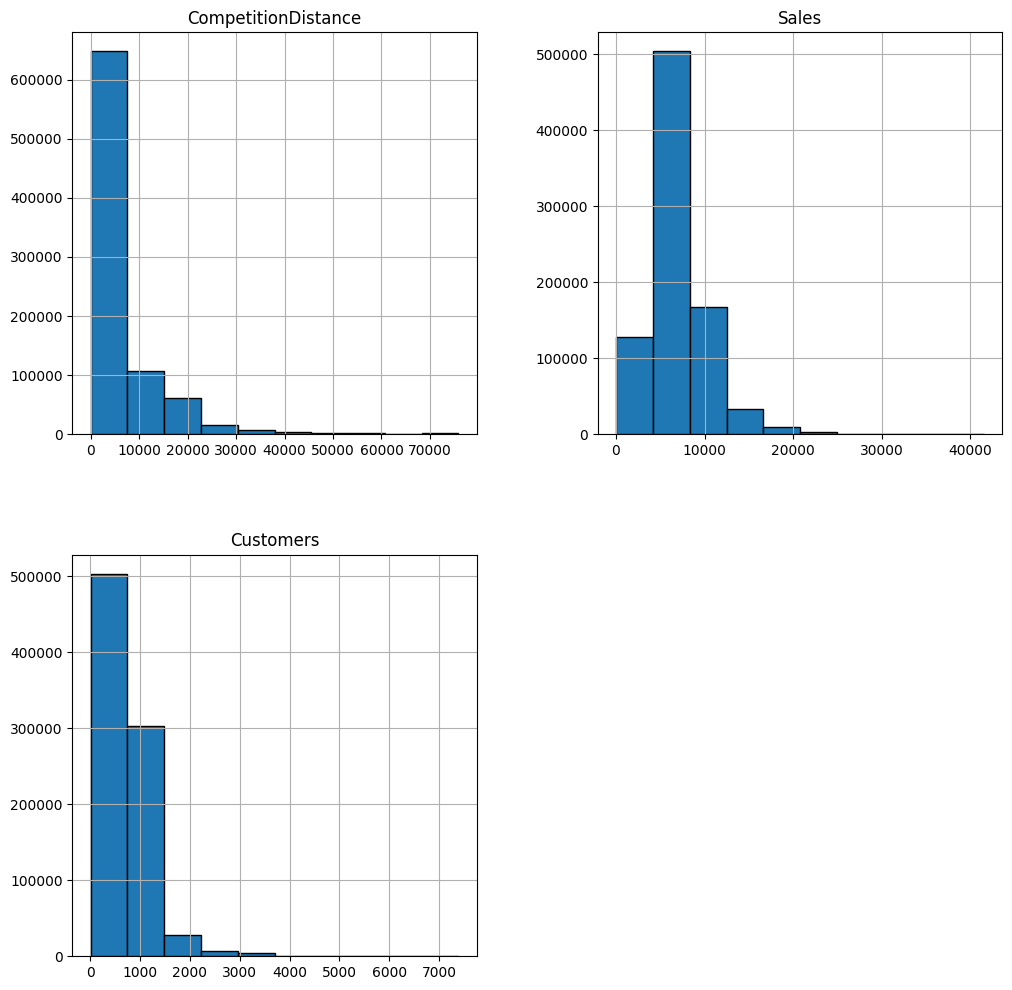

In [ ]:
# Chart - 1 visualization code
Combined_table_copy[Num_columns].hist(edgecolor='black',figsize=(12,12))

##### 1. Why did you pick the specific chart?

Since I want to know the distributions of different continuous variables available in the data, histogram would be the best choice. It allows me to see the frequency distribution of different columns.

##### 2. What is/are the insight(s) found from the chart?

Competition Distance - Maximum times distance from the competitor is between approx 0-7000. There are some instances where distnace is above 30,000 and can go upto 70,000.

Sales - Maximum sales in between 4000-8000. Next highest instances of sales is between 8000-13000 and then 0-8000.

Customers - Maximum number of cutomers footfall is between 0-800. Next highest is 800-1500.

Weekofyear - Number of Sales is highest in the starting weeks of the year. There is a dip in number of sales between 32th-46th weeks.

Day - Number of Sales is highest in the end days of the month. There is a dip in number of sales in starting days. Otherwise, no. of sales is uniform throughout a month.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can know the distribution of the different continuous variables and outliers present in the data.

#### Chart - 2 Sales and Store Type

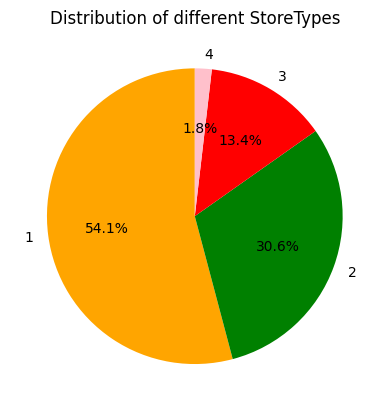

<Figure size 500x500 with 0 Axes>

In [ ]:
# Chart - 2 visualization code
labels = '1' , '2' , '3' , '4'
sizes = Combined_table_copy['StoreType'].value_counts()
colors = ['orange', 'green' , 'red' , 'pink']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of different StoreTypes")
plt.plot()
plt.figure(figsize = (5,5))
# fig.set_size_inches(6,6)
plt.show()

##### 1. Why did you pick the specific chart?

Pie chart is used to compare that how different values in a single category differs from each other.

##### 2. What is/are the insight(s) found from the chart?

We can see that Store Type 1 is showing highest count (54.2%). That means sales from Store 1 is highest. Second highest is from Store type 2.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We could divert our focus on Store 1 as most of the number of sales comes from here.

#### Chart - 3 Sales and StateHoliday

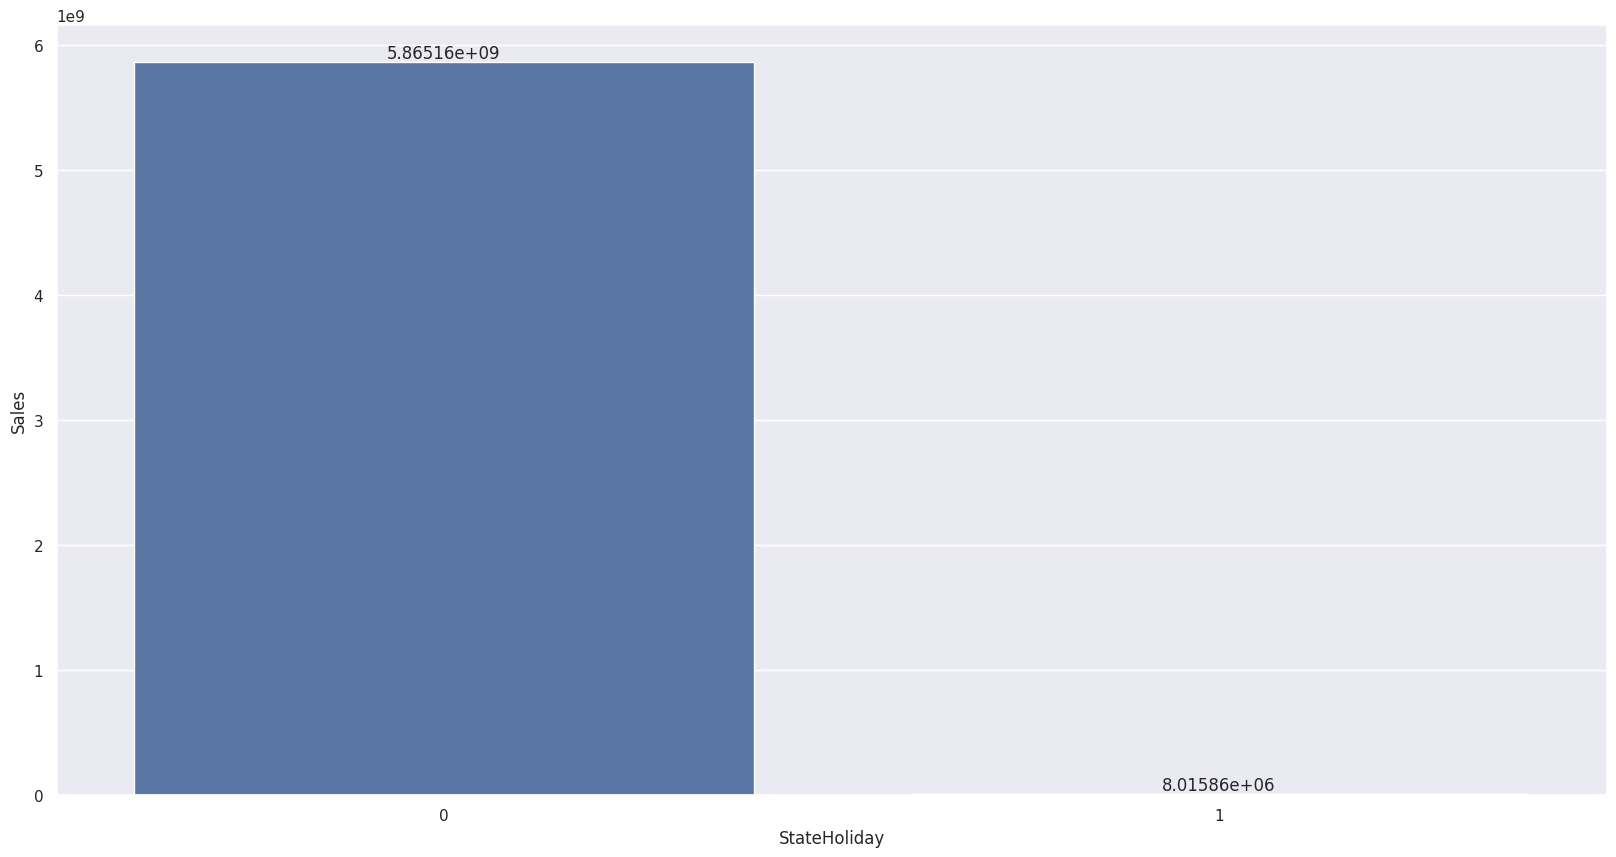

In [ ]:
# Chart - 3 visualization code
sns.set(rc={'figure.figsize':(20,10)})
Data = Combined_table_copy.groupby(['StateHoliday'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)
ax = sns.barplot(x = 'StateHoliday', y= 'Sales' ,data = Data)
for bars in ax.containers:
    ax.bar_label(bars)

##### 1. Why did you pick the specific chart?

Bar graphs are used to compare between different groups which are categorical in nature. Hence, it would be best to use it here.

##### 2. What is/are the insight(s) found from the chart?

We can clearly see that maximum sales happen when there is no holiday i.e 0.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is no significant positive or negative impact. Sales are bound to happen more when there is no state holiday.

#### Chart - 4 Sales and Competition Distance

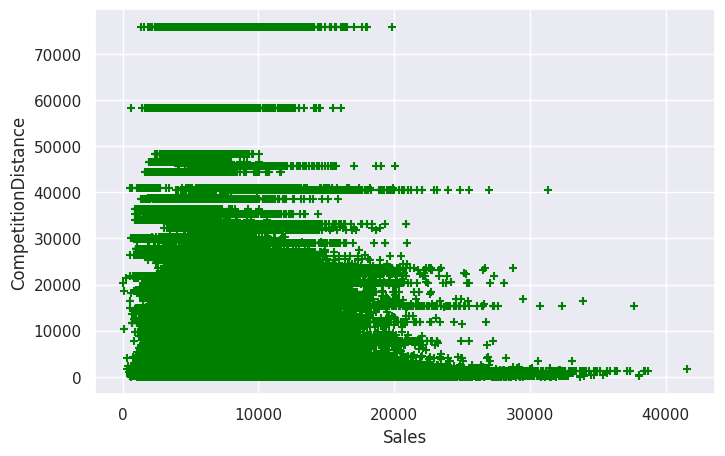

In [ ]:
# Chart - 4 visualization code
sns.set(rc={'figure.figsize':(8,5)})
plt.scatter(Combined_table_copy['Sales'], Combined_table_copy['CompetitionDistance'], color = "green", marker = "+")
plt.xlabel("Sales")
plt.ylabel('CompetitionDistance')
plt.show()

In [ ]:
Combined_table_copy["CompetitionDistance_Cat"] = pd.cut(Combined_table_copy["CompetitionDistance"], 5)
Combined_table_copy["CompetitionDistance_Cat"].value_counts()

(-55.84, 15188.0]     754603
(15188.0, 30356.0]     75149
(30356.0, 45524.0]     10466
(45524.0, 60692.0]      3233
(60692.0, 75860.0]       887
Name: CompetitionDistance_Cat, dtype: int64

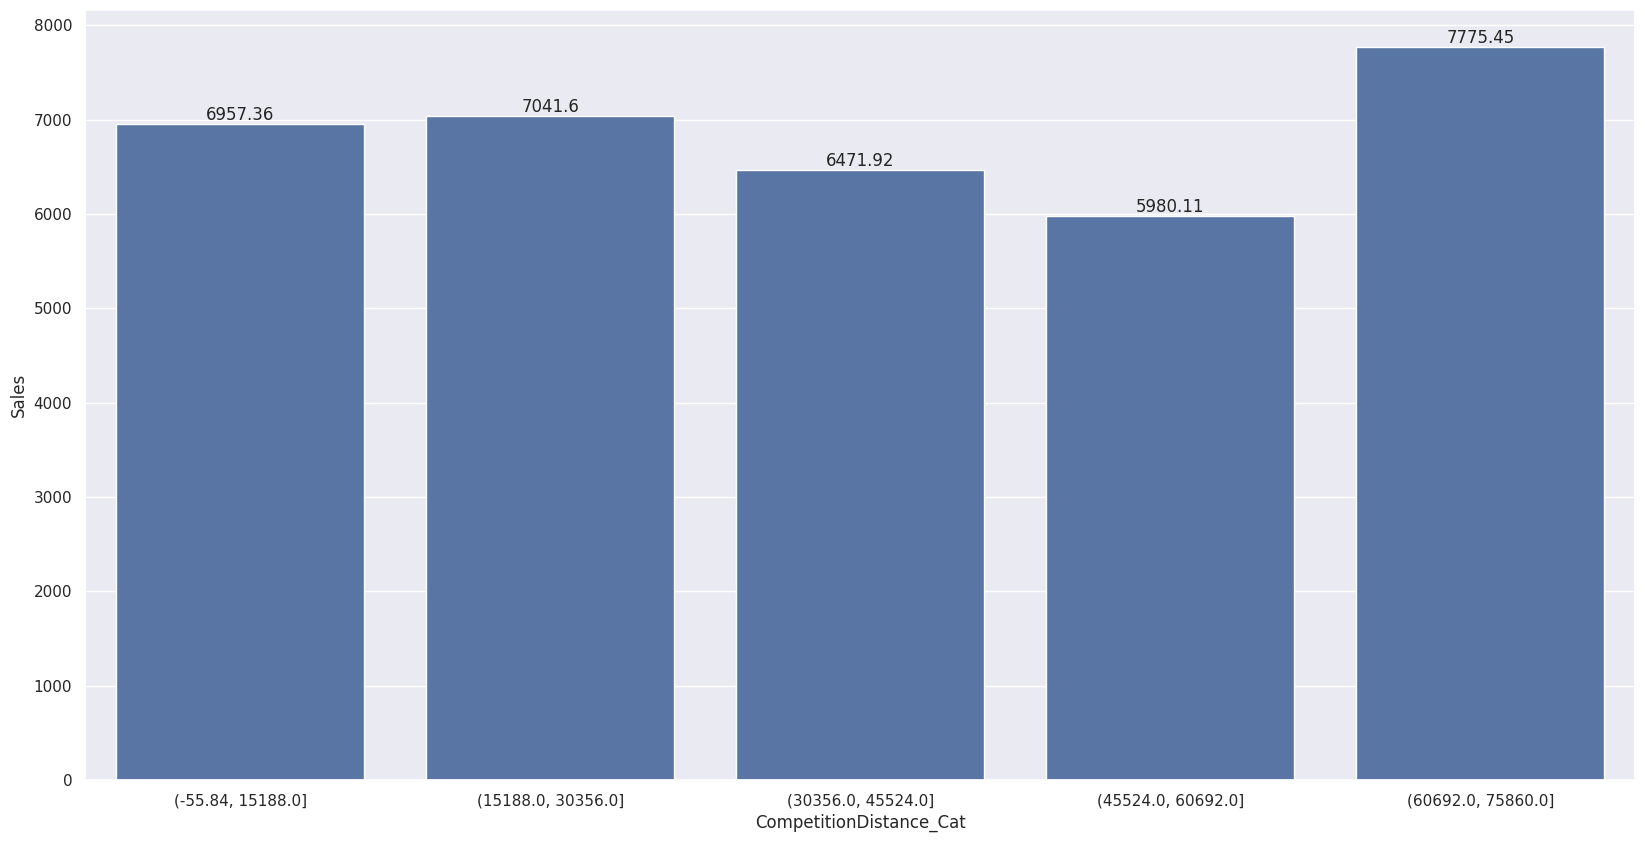

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
Data = Combined_table_copy.groupby(['CompetitionDistance_Cat'], as_index=False)['Sales'].mean().sort_values(by='Sales', ascending=False)
ax = sns.barplot(x = 'CompetitionDistance_Cat', y= 'Sales' ,data = Data)
for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
Combined_table_copy.drop(['CompetitionDistance_Cat'],axis=1,inplace=True)

##### 1. Why did you pick the specific chart?

Scatter plot helps to compare and visualize two variables in a same graph.

Bar graphs are used to compare between different groups which are categorical in nature. Hence, it would be best to use it here.

##### 2. What is/are the insight(s) found from the chart?

When the competitions is farthest, the stores are performing better in terms of sales. Also, there are some cases when the individual sales value is more than 25000 and competitor distance is very low. They could be the customers who are loyal to thier respective stores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We could get to know about competitors and how would they affect Store's sales. Farther the distance from competitors, more the sales.

#### Chart - 5 Sales and DayOfWeek

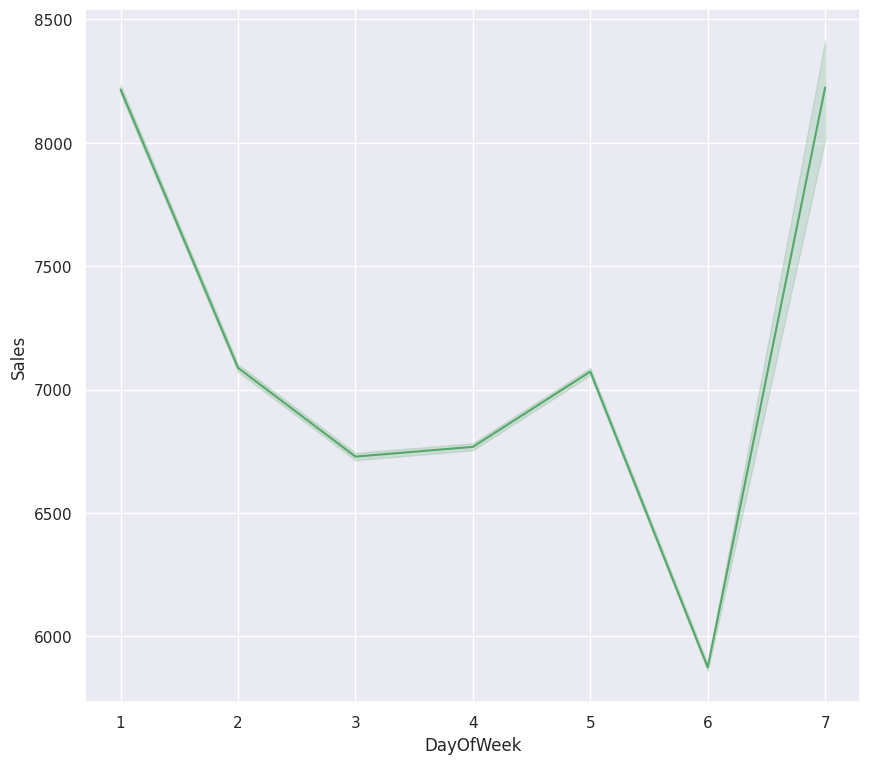

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize = (10,9))

# Visualizing how many are installs in different timelines.
sns.lineplot( x = 'DayOfWeek', y='Sales', color='g', data = Combined_table_copy)

plt.show()

##### 1. Why did you pick the specific chart?

Line graphs are used to track changes over short and long periods of time. Since here I want to check if there is a pattern in days in a week and sales at that time, line plot would be a good choice.

##### 2. What is/are the insight(s) found from the chart?

We could see that there is a sudden dip in sales on the last day of the every week. This could be the Sunday as there is usually a holiday on that day.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We could get to know that on the first 6 days of the week, sales is nearly same. Hence, we could focus on those days only.

#### Chart - 6 Sales and Promo

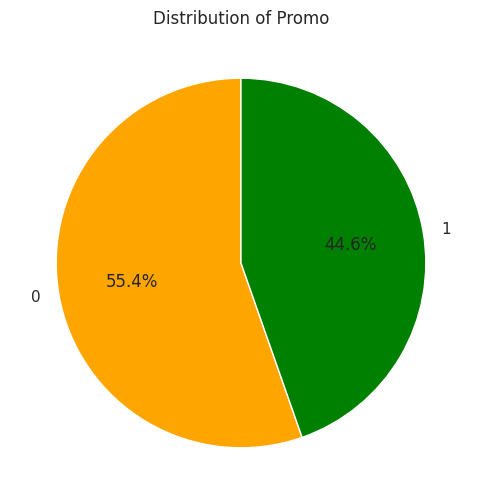

In [ ]:
# Chart - 6 visualization code
labels = '0' , '1'
sizes = Combined_table_copy['Promo'].value_counts()
colors = ['orange', 'green']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Promo")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

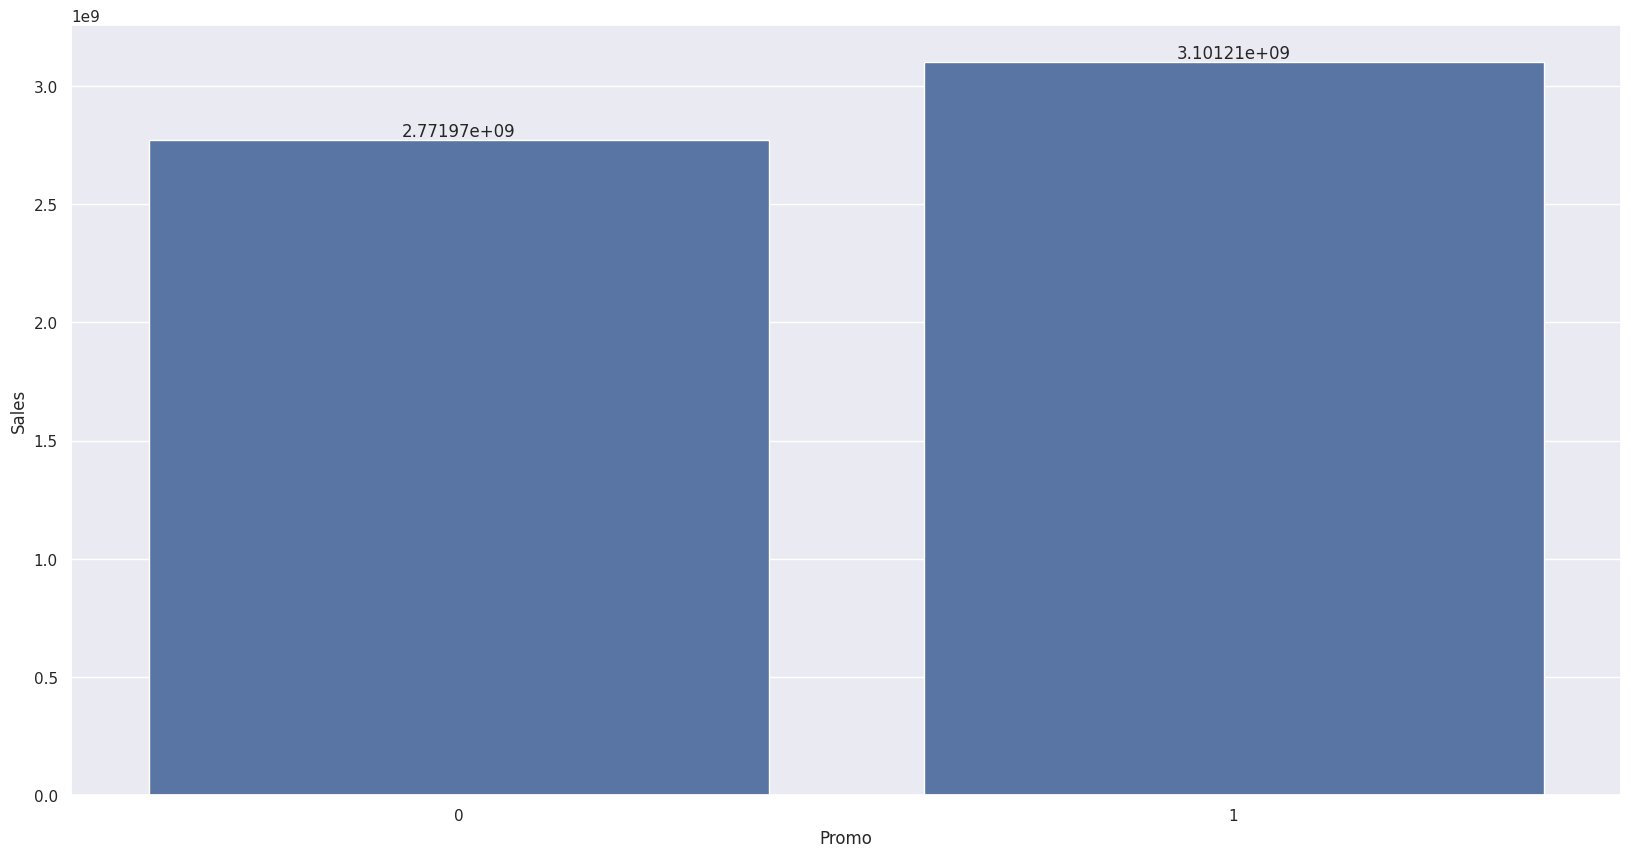

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
Data = Combined_table_copy.groupby(['Promo'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)
ax = sns.barplot(x = 'Promo', y= 'Sales' ,data = Data)
for bars in ax.containers:
    ax.bar_label(bars)

##### 1. Why did you pick the specific chart?

Pie chart is used to compare that how different values in a single category differs from each other.

Bar graphs are used to compare between different groups which are categorical in nature. Hence, it would be best to use it here.

##### 2. What is/are the insight(s) found from the chart?

We could see that there are more instances when there is promotion not going on. But still, sales are higher when there is promo going on.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Stores could increase their sales when they run promotions on special occasions.

#### Chart - 7 Sales and Year

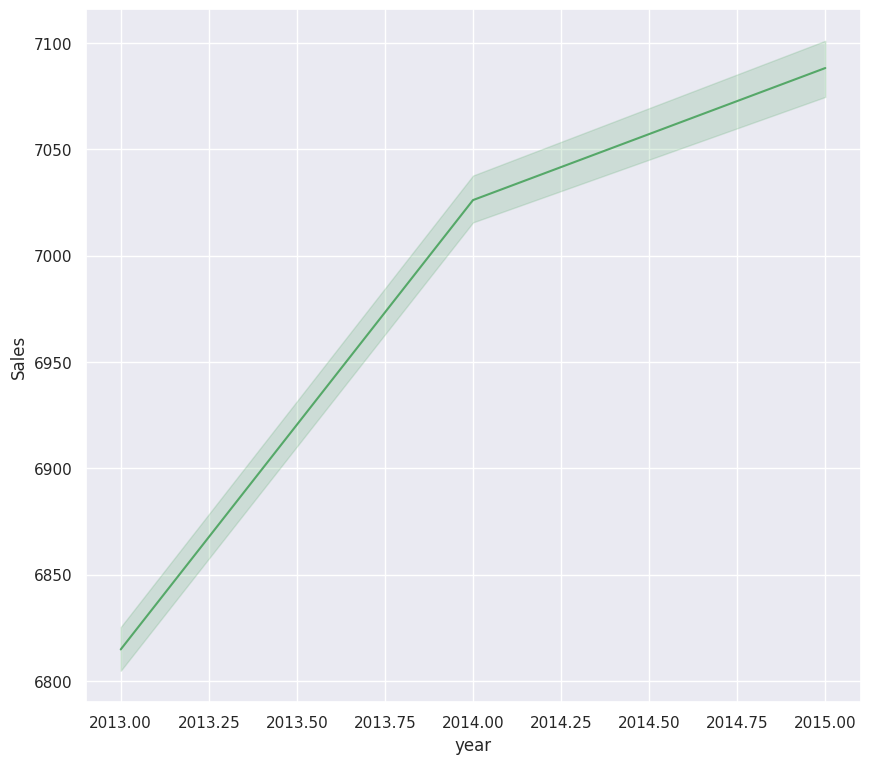

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize = (10,9))

# Visualizing how many are installs in different timelines.
sns.lineplot( x = 'year', y='Sales', color='g', data = Combined_table_copy)

plt.show()

##### 1. Why did you pick the specific chart?

Line graphs are used to track changes over short and long periods of time. Since here I want to check if there is a pattern in years and sales, line plot would be a good choice.

##### 2. What is/are the insight(s) found from the chart?

Overall trend is increasing year by year. We could also see that there is a shadow around the line. This shows the confidence interval, because the dataset contains multiple y(sales) values for each x(year) value. The line shadow represents the 95% confidence interval of the estimate i.e mean.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The increasing is positive for the stores and we could predict that in coming year, there could be the similar trend too in normal circumstances.

#### Chart - 8 Sales and Days

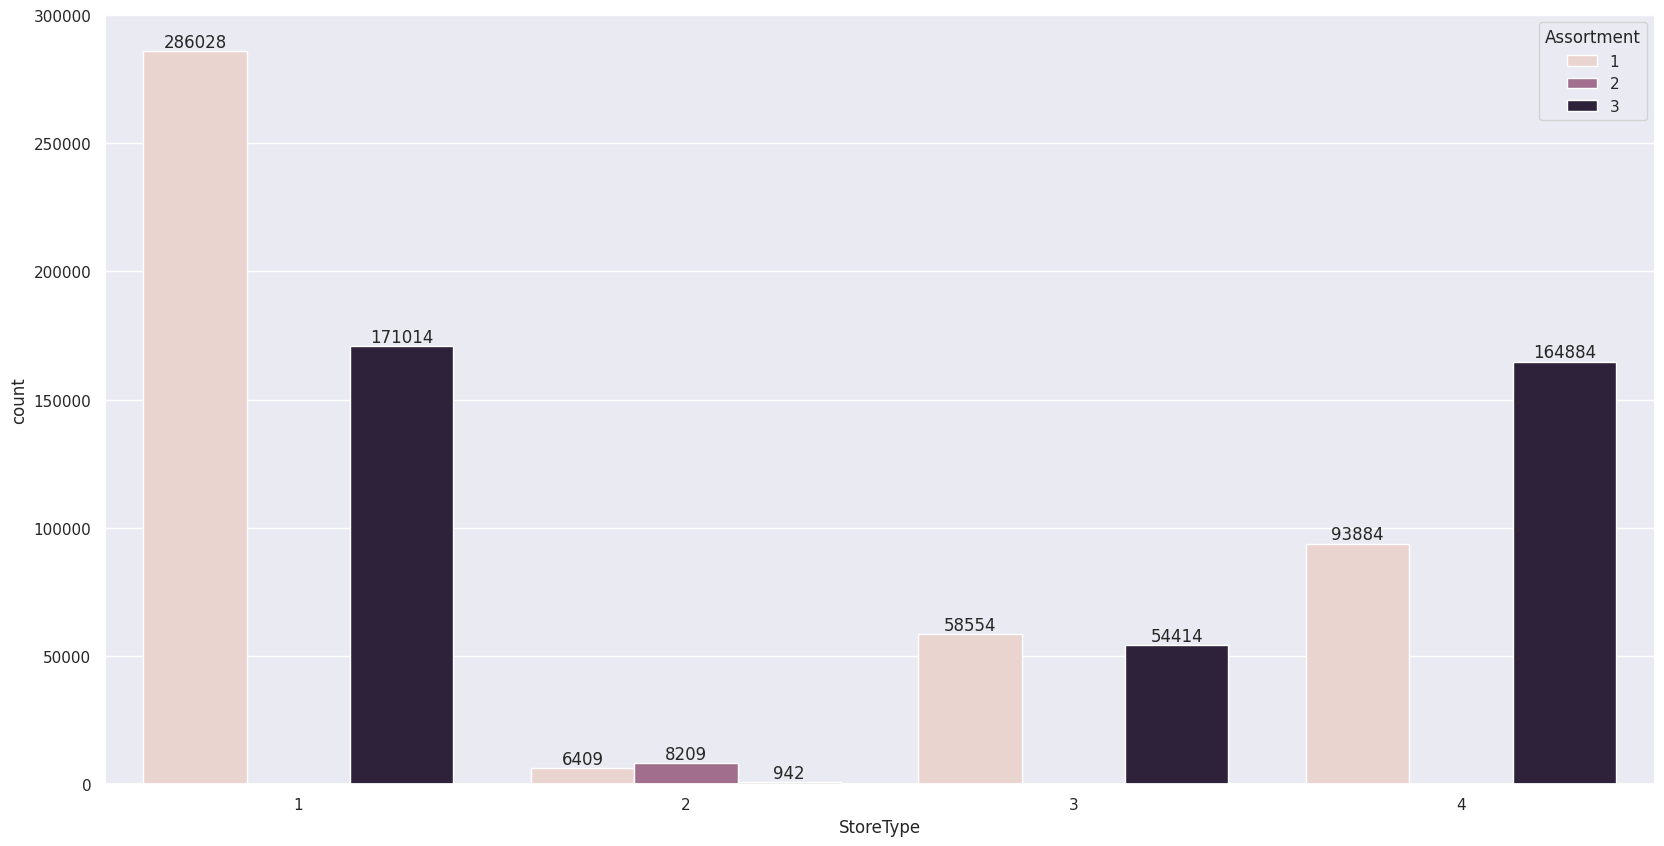

In [ ]:
# Chart - 8 visualization code

ax = sns.countplot(x='StoreType',hue='Assortment', data=Combined_table_copy)
for bars in ax.containers:
    ax.bar_label(bars)

##### 1. Why did you pick the specific chart?

Bar graphs are used to compare between different groups which are categorical in nature. Hence, it would be best to use it here.

##### 2. What is/are the insight(s) found from the chart?

Sales from assortment 1 and 3 is higher for store 1, 3 and 4.
For only store 2, highest total sales comes from assortment 2. Also, maximum sales comes from Store 1.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We could conclude that assortment 1 and 3 are important.

#### Chart - 9 Sales and Customers

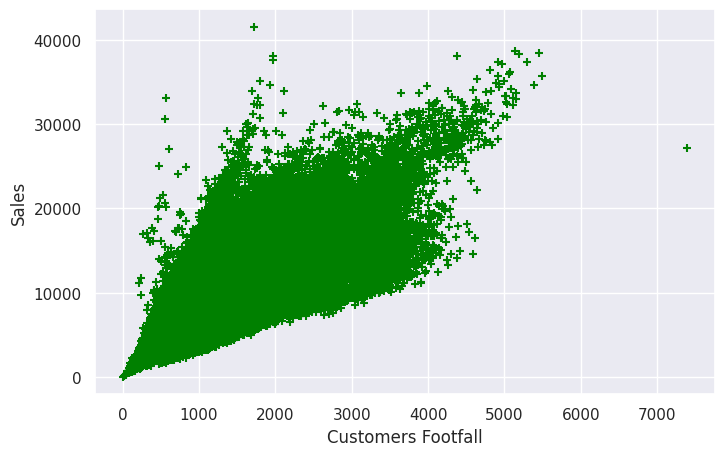

In [ ]:
# Chart - 9 visualization code
sns.set(rc={'figure.figsize':(8,5)})
plt.scatter( Combined_table_copy['Customers'], Combined_table_copy['Sales'], color = "green", marker = "+")
plt.ylabel("Sales")
plt.xlabel('Customers Footfall')
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plot helps to compare relationship and visualize two variables in a same graph.

##### 2. What is/are the insight(s) found from the chart?

We can clearly se that the trend is increasing i.e. when the customer fottfall increases on a day, there is obviously a greater sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If a store want to increase thier sales, they should focus on attracting more customers.

#### Chart - 10 Promo, sales and month

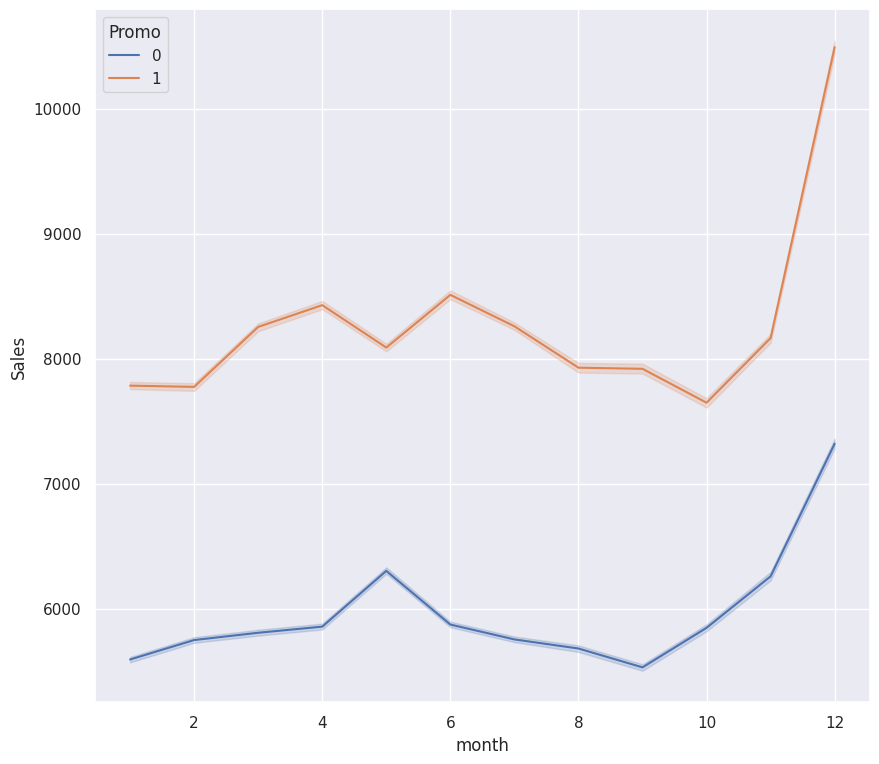

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize = (10,9))

# Visualizing how many are installs in different timelines.
sns.lineplot( x = 'month', y='Sales', color='g', data = Combined_table_copy, hue = "Promo")

plt.show()

##### 1. Why did you pick the specific chart?

Line graphs are used to track changes over short and long periods of time. Since here I want to check if there is a pattern in promo with month and sales, line plot would be a good choice.

##### 2. What is/are the insight(s) found from the chart?

We could see with promo running, there is higher sales with significant margin for every month of the year. Also when the promo is running, there is a sudden hike in the sales in the months of November and December.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Promo should be running whenever stores want to increase thier sales.

#### Chart - 11 Sales and School Holiday

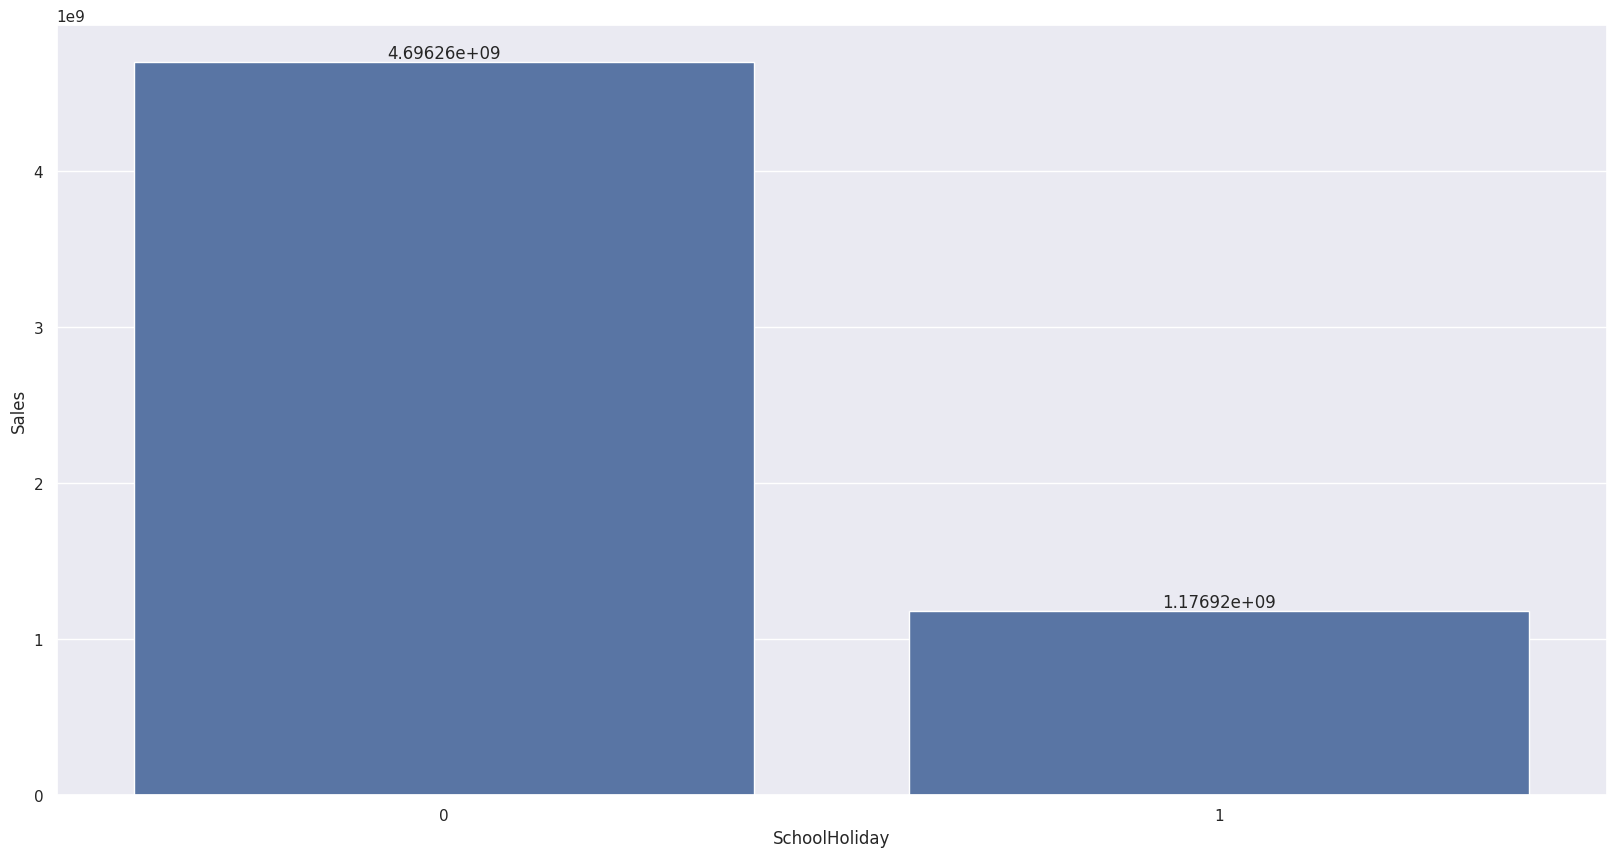

In [ ]:
# Chart - 11 visualization code
sns.set(rc={'figure.figsize':(20,10)})
Data = Combined_table_copy.groupby(['SchoolHoliday'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)
ax = sns.barplot(x = 'SchoolHoliday', y= 'Sales' ,data = Data)
for bars in ax.containers:
    ax.bar_label(bars)

##### 1. Why did you pick the specific chart?

Bar graphs are used to compare between different groups which are categorical in nature. Hence, it would be best to use it here.

##### 2. What is/are the insight(s) found from the chart?

We can clearly see that maximum sales happen when there is no school holiday i.e 0. But unlike state holiday, we could still see there is some sales happen on school holiday. Hence, School holiday won't affect sales as much as State holiday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Stores could make thier stategies keeping in mind that school holidays would not affect much sales as much as state holidays would do.

#### Chart - 12 Store type, sales and month

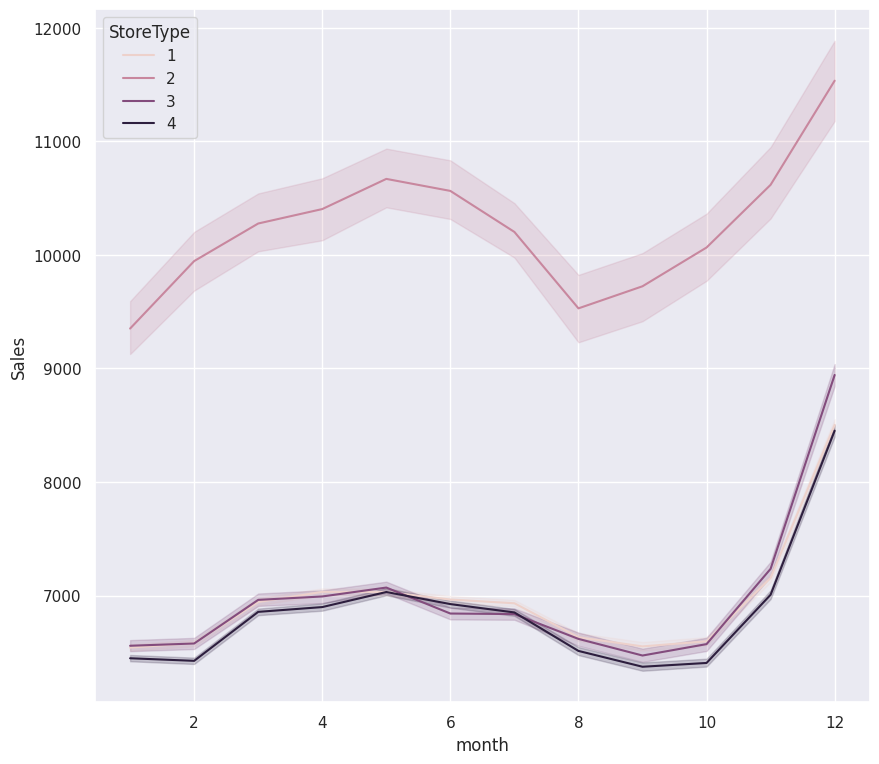

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize = (10,9))

# Visualizing how many are installs in different timelines.
sns.lineplot( x = 'month', y='Sales', color='g', data = Combined_table_copy, hue = "StoreType")

plt.show()

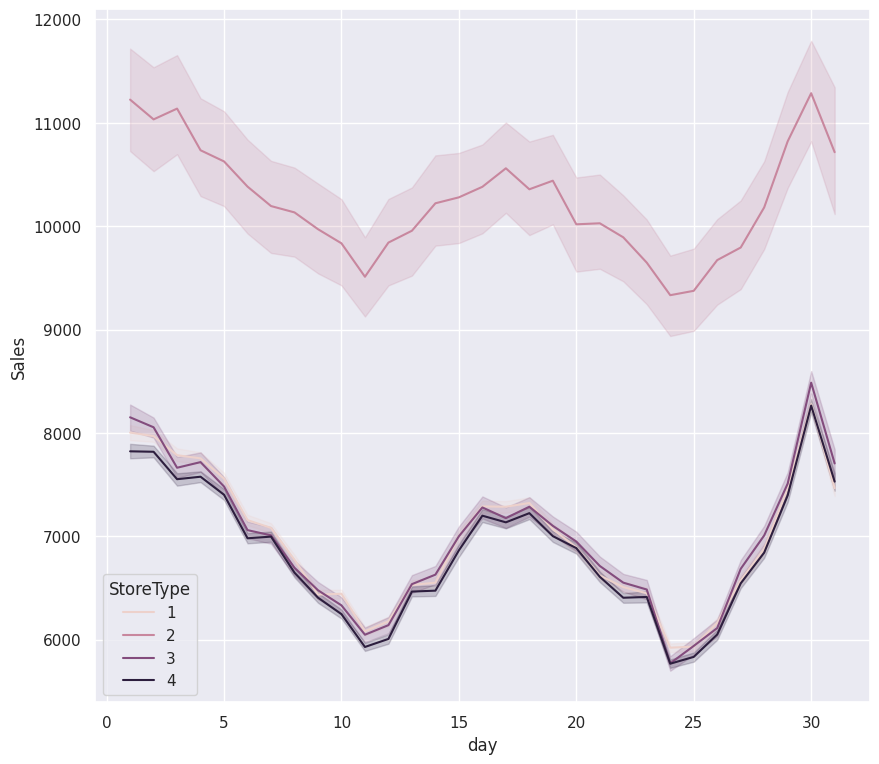

In [ ]:
plt.figure(figsize = (10,9))

# Visualizing how many are installs in different timelines.
sns.lineplot( x = 'day', y='Sales', color='g', data = Combined_table_copy, hue = "StoreType")

plt.show()

##### 1. Why did you pick the specific chart?

Line graphs are used to track changes over short and long periods of time. Since here I want to check if there is a pattern in Store type with month, days within month and sales, line plot would be a good choice.

##### 2. What is/are the insight(s) found from the chart?

We could see that store 1 generate higher sales with significant margin for every month and days. Other stores shoes similar and equal pattern in both cases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Store 1 should be focus more than others.

#### Chart - 13 Promo2 and sales

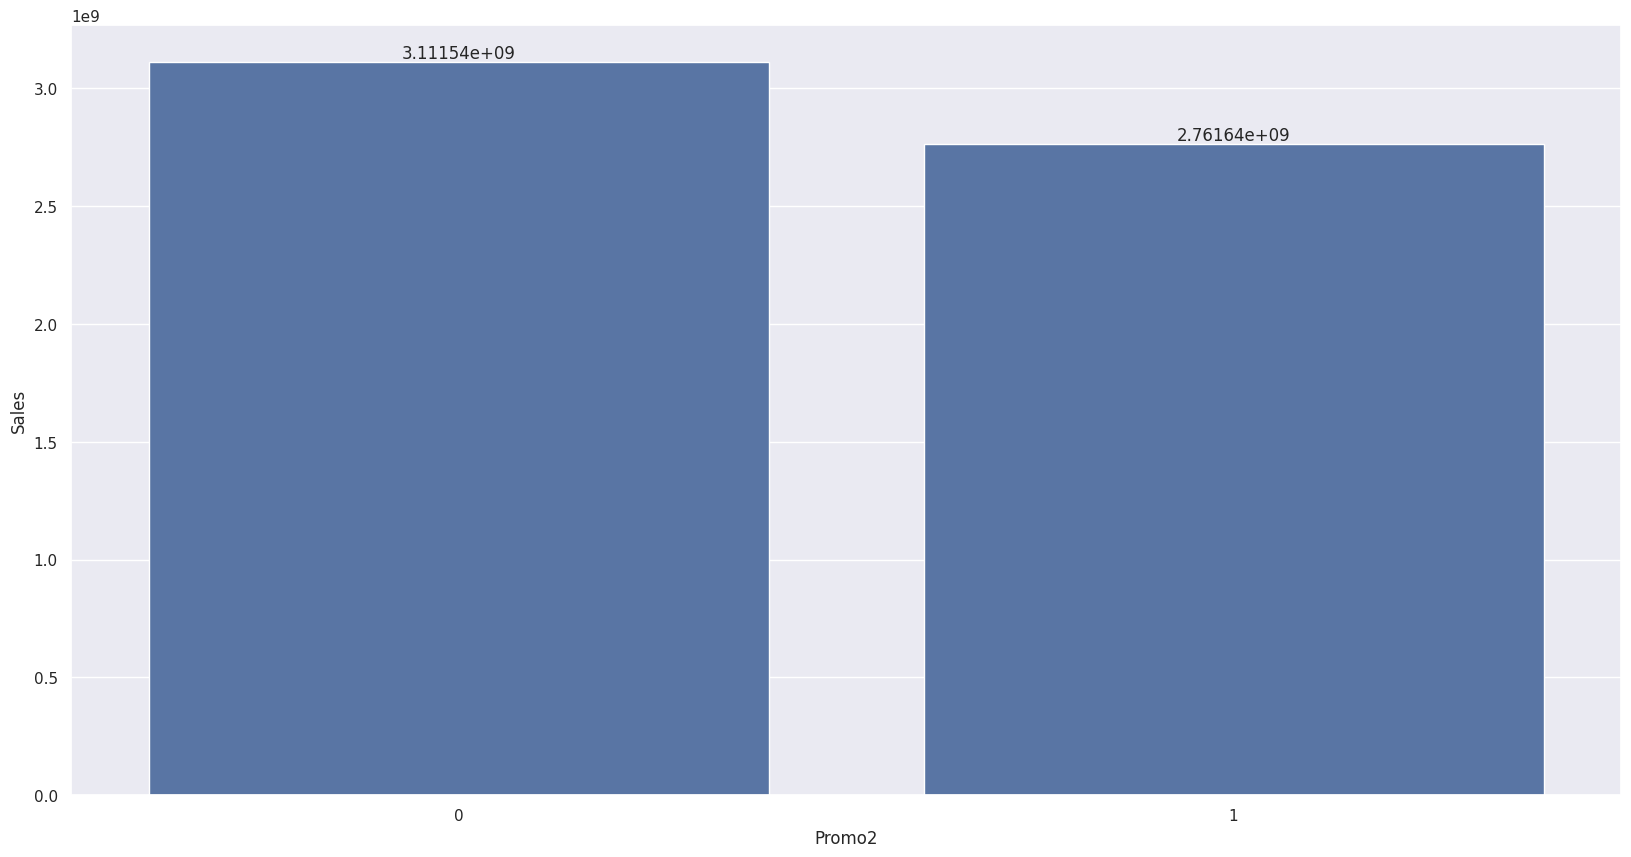

In [ ]:
# Chart - 13 visualization code
sns.set(rc={'figure.figsize':(20,10)})
Data = Combined_table_copy.groupby(['Promo2'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)
ax = sns.barplot(x = 'Promo2', y= 'Sales' ,data = Data)
for bars in ax.containers:
    ax.bar_label(bars)

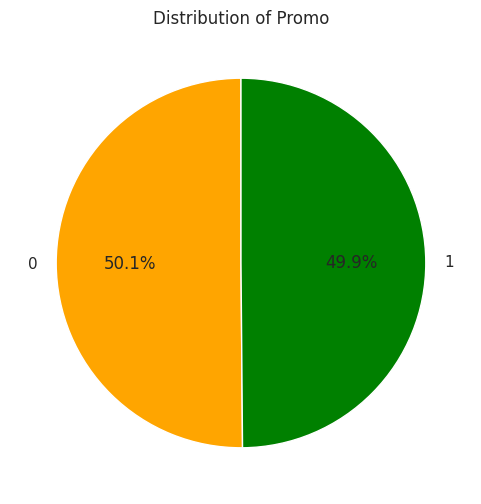

In [ ]:
labels = '0' , '1'
sizes = Combined_table_copy['Promo2'].value_counts()
colors = ['orange', 'green']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Promo")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

##### 1. Why did you pick the specific chart?

Pie chart is used to compare that how different values in a single category differs from each other.

Bar graphs are used to compare between different groups which are categorical in nature. Hence, it would be best to use it here.Answer Here.

##### 2. What is/are the insight(s) found from the chart?

We could see that sales don't have a big impact over sales. Hence, we will drop this column and would not use in ML.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Running promo consecutively dont have a significant impact on sales.

#### Chart - 14 - Correlation Heatmap

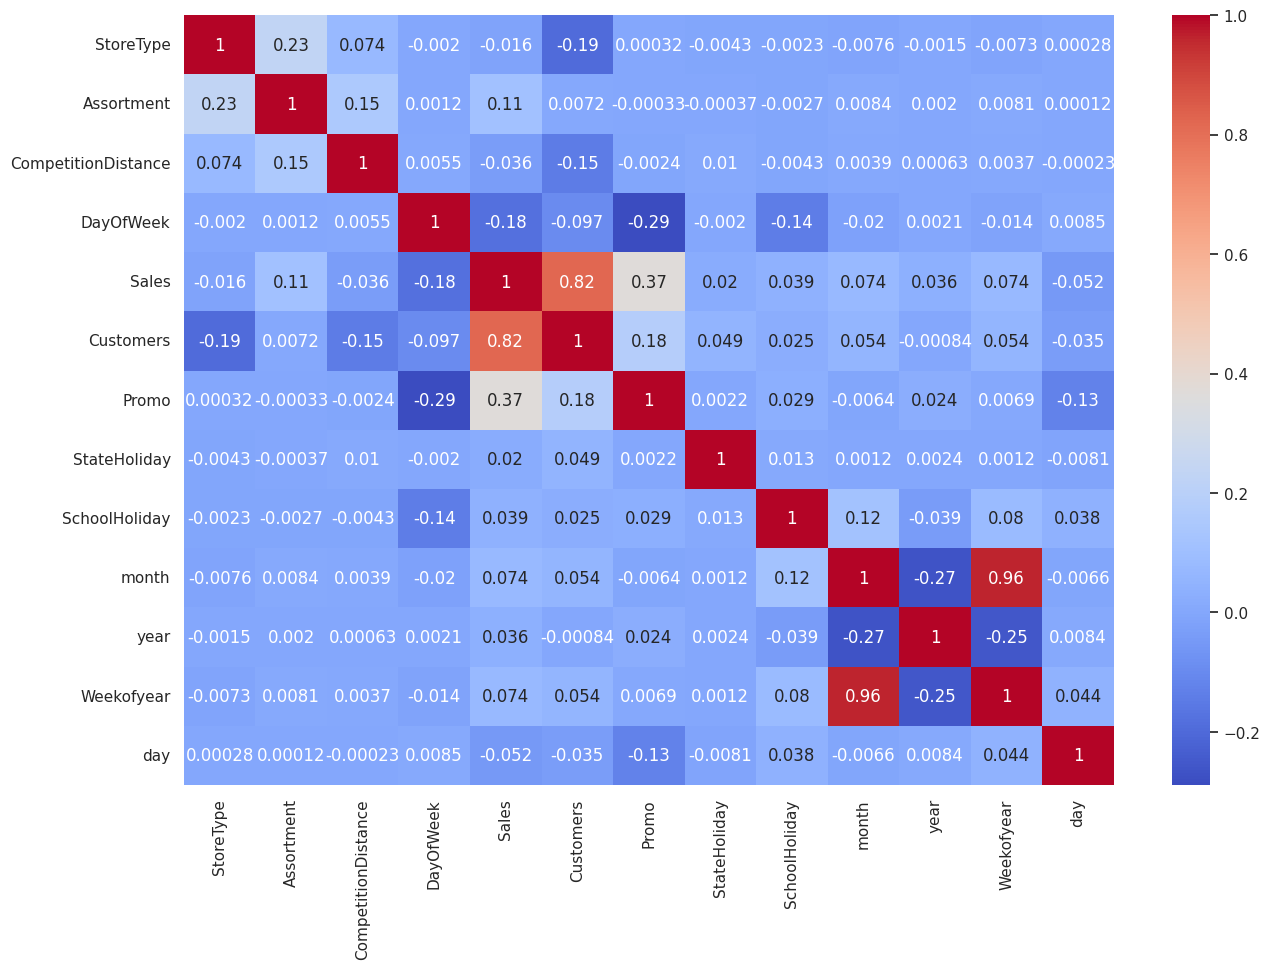

In [ ]:
# Correlation Heatmap visualization code
fig = plt.figure(figsize =(15, 10))
Correlation_Heatmap = sns.heatmap(Combined_table_copy.corr(), cmap='coolwarm', annot=True)

##### 1. Why did you pick the specific chart?

Correlation heatmap is used to analyse relationship between two variables at a time. Positive correlation means if one increases other also increases and vice-versa.

##### 2. What is/are the insight(s) found from the chart?

Month and Week of the year has 0.97 correlation. It means we can keep only one out of it.

Sales and customers has 0.82 correlation.

Sales and promo has 0.37 correlation.

#### Chart - 15 - Pair Plot

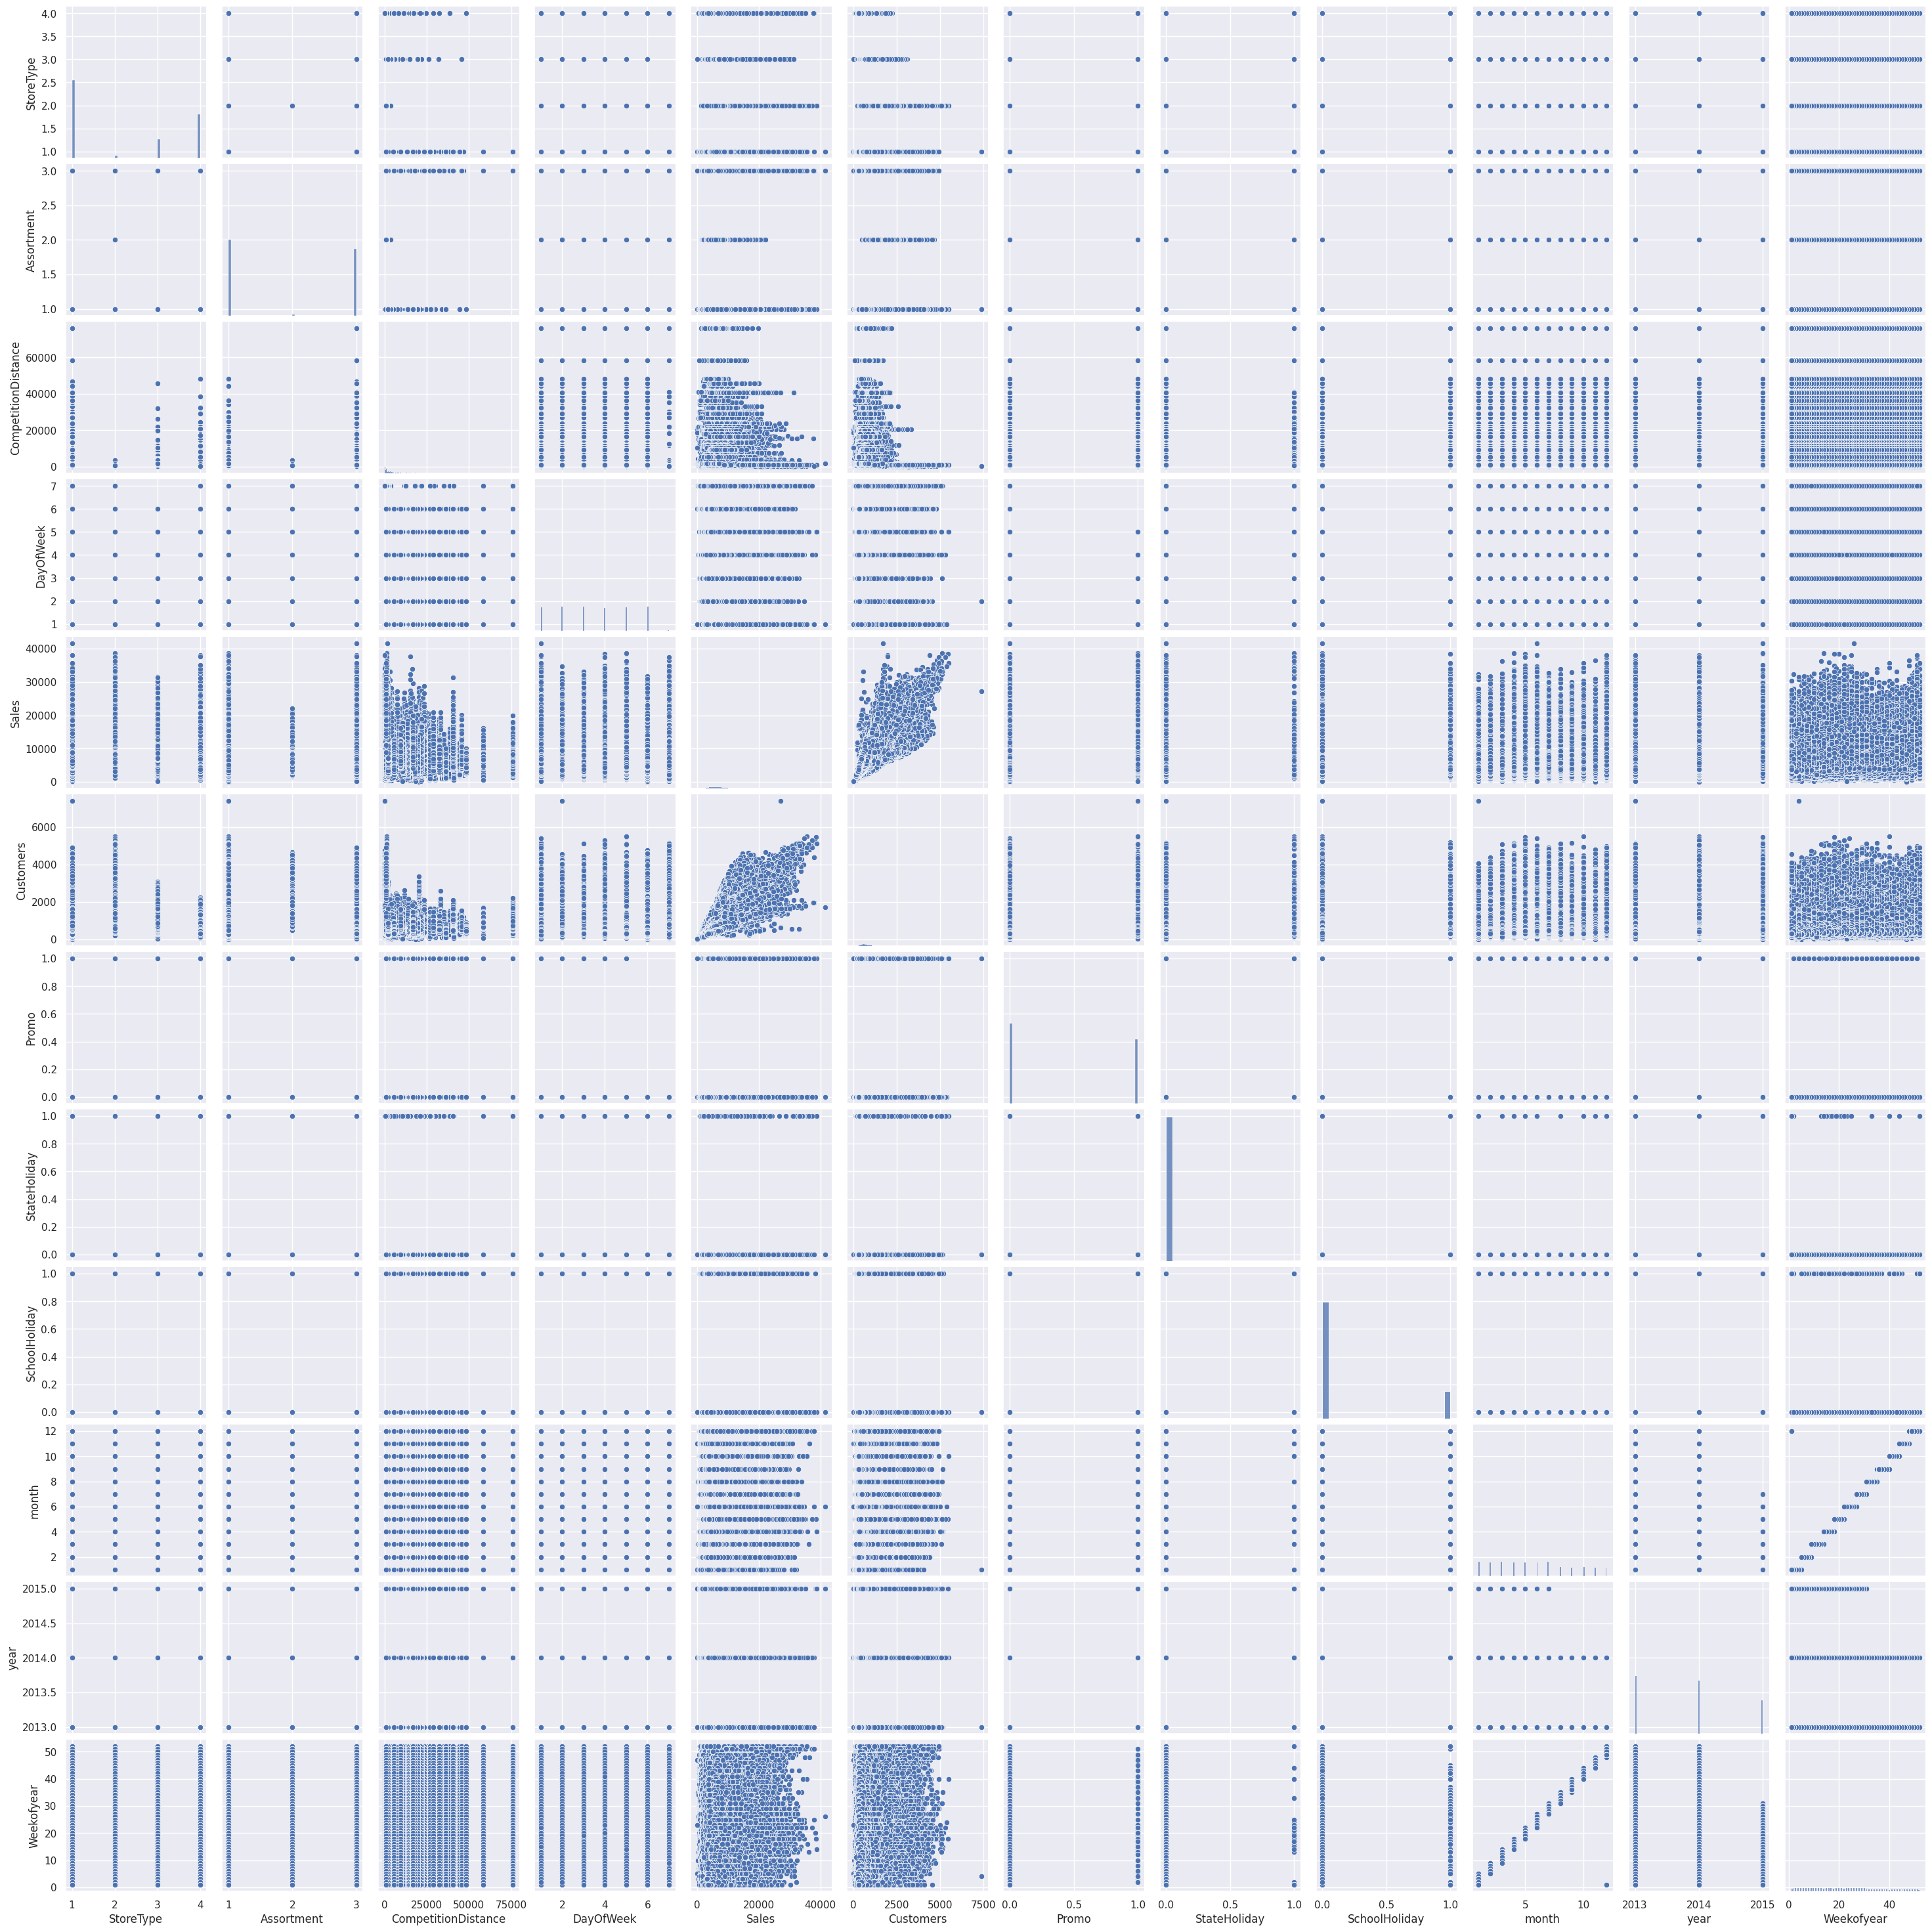

In [273]:
# Pair Plot visualization code
sns.pairplot(Combined_table_copy)


##### 1. Why did you pick the specific chart?

A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. Its perfect if we want to know the relationship between two variables.

##### 2. What is/are the insight(s) found from the chart?

From chart we can see relationship between two variables at a time. For example, as Customers increases, sales increases.



## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1) Customers footfall per day is 633.
2) There is no relationship between Sales and Promo.
3) Sales per day is 5000.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : mean = 633

Alternate Hypothesise : mean != 633

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

data = Combined_table_copy['Customers']

t_stat, p_value = stats.ttest_1samp(data, 633)

print("Test statistic:", t_stat)
print("p-value:", p_value)

Test statistic: 297.2363092565669
p-value: 0.0


In [ ]:
if p_value < 0.05:       # 0.05 is the significance level
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

I have used t-test to find p-value. It is found that we fail to reject the null hypothesis. It means customers footfall is 633 per day.

##### Why did you choose the specific statistical test?

From the EDA we have done above, we get to know that the distribution of customers is postively skewed. For a skewed data Z-Test can't be performed.

So, for a skewed data we can use T-test for better result. Thus, I used t - test.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: There is no relationship between Sales and Promo

ALternative Hypothesis: There is relationship between Sales and Promo

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

sales = Combined_table_copy['Sales']
promo = Combined_table_copy['Promo']

correlation, p_value = pearsonr(sales, promo)

print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)

if p_value < 0.05:                         # # 0.05 is the significance level
    print("Reject the null hypothesis.")
else:
    print("Accept the null hypothesis.")

Pearson correlation coefficient: 0.368199290472041
p-value: 0.0
Reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

I have used the Pearson correlation coefficient to test the hypothesis. The Pearson correlation coefficient measures the strength and direction of the linear relationship between two variables.

We reject the null hythosesis, it means there is a relationship between Sales and Promo.

##### Why did you choose the specific statistical test?

Pearson correlation helps to find out the Correlation coefficient value which ranges from -1 and 1. A Correlation value of 1 means perfect positive correlation, whereas correlation value of -1 means strong negative relationship and a correlation value of 0 means no relationship between the features. Also the P-value helps us to find out the statistical importance of the correlation.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : mean = 6000

Alternate Hypothesise : mean != 6000

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

data = Combined_table_copy['Sales']

t_stat, p_value = stats.ttest_1samp(data, 6000)

print("Test statistic:", t_stat)
print("p-value:", p_value)

Test statistic: 283.0098785304999
p-value: 0.0


In [ ]:
if p_value < 0.05:                                # 0.05 is the significance level
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

I have used t-test to find p-value. It is found that we reject the null hypothesis. It means that the sales per day is not 6000.

##### Why did you choose the specific statistical test?

From the EDA we have done above, we get to know that the distribution of sales is postively skewed. For a skewed data Z-Test can't be performed.

So, for a skewed data we can use T-test for better result. Thus, I used t - test.

## ***6. Feature Engineering & Data Pre-processing***

In [85]:
# Combined_table_copy.drop('Promo2', axis = 'columns' ,inplace = True)
Combined_table_fe = Combined_table_copy.copy()

In [86]:
Combined_table_fe.shape

(844338, 13)

### 1. Handling Missing Values

In [87]:
# Handling Missing Values & Missing Value Imputation

# i have already handled missing values present in the data.

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

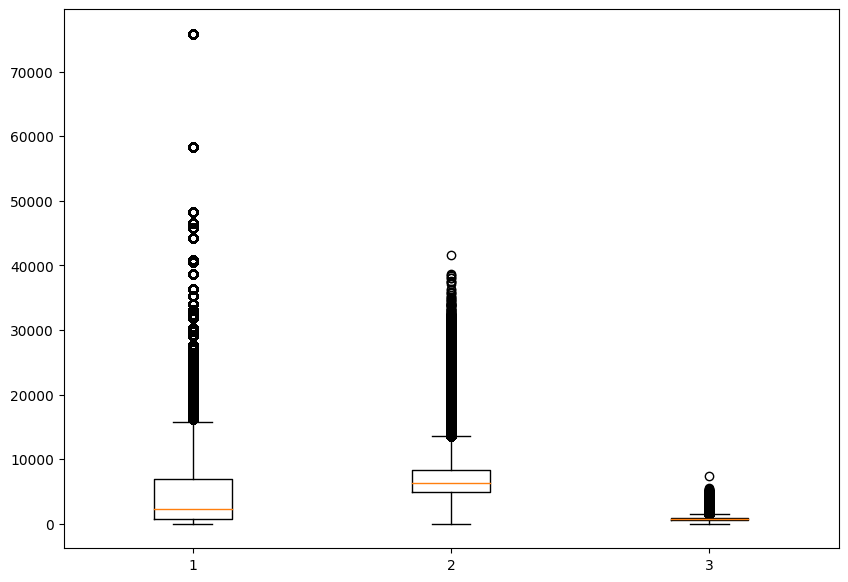

In [88]:
# Handling Outliers & Outlier treatments
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(Combined_table_fe[Num_columns])
plt.show()

In [89]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [90]:
Combined_table_fe = remove_outlier(Combined_table_fe, 'Sales')
Combined_table_fe = remove_outlier(Combined_table_fe, 'CompetitionDistance')
Combined_table_fe = remove_outlier(Combined_table_fe, 'Customers')
Combined_table_fe.shape

(710375, 13)

##### What all outlier treatment techniques have you used and why did you use those techniques?

I have used Interquartile Range (IQR) method to remove outliers in the continuous variables present in the data i.e. Sales, Customers and Competition Distance. Outliers can cause biased results if feeded into the machine learning models.

### 3. Categorical Encoding

In [91]:
# Encode your categorical columns

# I have already done Ordinal encoding during data wrangling process of the following columns as they were already masked columns - StoreType, assortment and StateHoliday.
# I will also do the encoding of years as it have only 3 values and can be used aa a category.

In [92]:
Combined_table_fe['year'] = Combined_table_fe['year'].astype('category')
ordinal_encoder1 = ce.OrdinalEncoder(mapping=[{'col': 'year', 'mapping': {2013: 1, 2014: 2, 2015: 3}}])
Combined_table_fe['year'] = ordinal_encoder1.fit_transform(Combined_table_fe)['year']

<ipython-input-92-666950fd95be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Combined_table_fe['year'] = Combined_table_fe['year'].astype('category')


In [93]:
Combined_table_fe['year'].value_counts()

1    284459
2    260000
3    165916
Name: year, dtype: int64

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used Ordinal Category to do encoding of above variables to keep check on the order of the values of a variable.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [94]:
# Manipulate Features to minimize feature correlation and create new features
X = Combined_table_fe.drop('Sales', axis='columns')

def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["feature"] = dataframe.columns

    # Calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(len(dataframe.columns))]
    return vif_data

vif_sample_df = calculate_vif(X)

vif_sample_df


,feature,VIF
0,StoreType,3.935916
1,Assortment,4.944775
2,CompetitionDistance,2.036690
3,DayOfWeek,4.731352
4,Customers,7.591769
5,Promo,2.016151
6,StateHoliday,1.000750
7,SchoolHoliday,1.300650
8,month,54.411156
9,year,5.629327


Month and Weekofyear has the highest VIF Scores. Also, correlation betweem month and week of the year is 0.97 which is very high and 0.049 and 0.053 correlation respectively with sales (which is quite similar). Hence, we will keep only one of them i.e week of the year.

#### 2. Feature Selection

In [95]:
# Select your features wisely to avoid overfitting
Combined_table_fe.drop('month', axis = 'columns' ,inplace = True)
Combined_table_fe.columns

Index(['StoreType', 'Assortment', 'CompetitionDistance', 'DayOfWeek', 'Sales',
       'Customers', 'Promo', 'StateHoliday', 'SchoolHoliday', 'year',
       'Weekofyear', 'day'],
      dtype='object')

##### What all feature selection methods have you used  and why?

I have used Correlation heatmap and VIF Methods to select features for ML Models.

Variance Inflation Factor (VIF) is a measure used primarily to detect multicollinearity among predictors within a multiple regression model. However, it can also be indirectly used as a feature selection method. VIF assesses how much the variance of an estimated regression coefficient increases if your predictors are correlated. A high VIF indicates that the predictor is highly collinear with the other predictors, and therefore, its coefficient is not well estimated.

Correlation heatmap is used to check correlation of the high VIF Scorers.

##### Which all features you found important and why?

I keep following columns - 'StoreType', 'Assortment', 'CompetitionDistance', 'DayOfWeek', 'Sales', 'Customers', 'Promo', 'StateHoliday', 'SchoolHoliday', 'year', 'Weekofyear', 'day', after analysing VIF and correlation.

### 6. Data Scaling

In [96]:
# Scaling your data
X = Combined_table_fe.drop('Sales', axis='columns')
y = Combined_table_fe['Sales']
SS = StandardScaler()
X = SS.fit_transform(X)
X

array([[ 0.5480443 , -0.91971122, -0.59946769, ...,  1.49876697,
         0.52534276,  1.75112296],
       [ 0.5480443 , -0.91971122, -0.59946769, ...,  1.49876697,
         0.52534276,  1.63542148],
       [ 0.5480443 , -0.91971122, -0.59946769, ...,  1.49876697,
         0.52534276,  1.51971999],
       ...,
       [ 1.27612333,  1.09056218,  0.47324271, ..., -1.07009168,
        -1.57033519, -1.3728171 ],
       [ 1.27612333,  1.09056218,  0.47324271, ..., -1.07009168,
        -1.57033519, -1.48851858],
       [ 1.27612333,  1.09056218,  0.47324271, ..., -1.07009168,
        -1.57033519, -1.60422007]])

##### Which method have you used to scale you data and why?

I have used the Standard Scaler to scale down the data so that the data has a mean value of 0 and standard deviation of 1. Scaling is important as when features have significantly of different scales, it can lead to biased model training or result in features with larger scales dominating the learning process.

### 8. Data Splitting

In [109]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8) #random_state = 42


##### What data splitting ratio have you used and why?

I have used the 80-20 ratio of data spilitting so that model would have enough data to train itself.

## ***7. ML Model Implementation***

### ML Model - 1 (Linear Regression)

In [100]:
# ML Model - 1 Implementation
model = LinearRegression()

# Fit the Algorithm
model.fit(X_train, y_train)

# Predict on the model
y_test_pred = model.predict(X_test)

In [101]:
model.score(X_test,y_test)

0.7510920332865452

In [102]:
y_train_pred = model.predict(X_train)
model.score(X_train,y_train)

0.7503070452873374

In [440]:
print('coefficients: ',model.coef_)
print('intercept: ',model.intercept_)

coefficients:  [ 386.84420439  151.33562795  331.77386064  -30.23028962 1810.91896558
  520.26588812  -25.88403868   10.85220268  126.07635482   79.98401667
    3.55328883]
intercept:  6444.212019430802


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting.

LinearRegression fits a linear model with coefficients to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.



In [54]:
# Visualizing evaluation Metric Score chart
def Metric_score_chart(y_train,y_train_pred,y_test,y_test_pred):

  #mean_absolute_error metrics
  MAE = mean_absolute_error(y_train,y_train_pred)
  print('MAE train score is :',MAE)
  MAE = mean_absolute_error(y_test,y_test_pred)
  print('MAE test score is :',MAE)

  #mean_squared_error metrics
  MSE = mean_squared_error(y_train,y_train_pred)
  print('MSE train score is :',MSE)
  MSE = mean_squared_error(y_test,y_test_pred)
  print('MSE test score is :',MSE)

  #Root mean square error
  rmse = sqrt(mean_squared_error(y_train,y_train_pred))
  print('RMSE train Score: ',rmse)
  rmse = sqrt(mean_squared_error(y_test, y_test_pred))
  print('RMSE test Score: ',rmse)

  #R2 score
  r2 = r2_score(y_train,y_train_pred)
  print('r2 train score: ',r2)
  r2 = r2_score(y_test,y_test_pred)
  print('r2 test score: ',r2)

In [80]:
Metric_score_chart(y_train, y_train_pred, y_test, y_test_pred)

MAE train score is : 873.3826296504881
MAE test score is : 873.5954143403432
MSE train score is : 1308849.1882119826
MSE test score is : 1309164.4763487903
RMSE train Score:  1144.0494693027845
RMSE test Score:  1144.1872558059674
r2 train score:  0.7505802259924687
r2 test score:  0.7501959251833834


#### 2. Cross- Validation & Hyperparameter Tuning

##### Ridge Regression

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

ridge = Ridge()
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(ridge, param_grid,scoring='r2',cv=5)

# Fit the Algorithm
grid_search.fit(X_train, y_train)

# Predict on the model
y_train_pred_grid = grid_search.predict(X_train)
y_test_pred_grid = grid_search.predict(X_test)

# Retrieve the best hyperparameters and best score
best_params = print('best param:',grid_search.best_params_)
best_score = print('best score:',grid_search.best_score_)

best param: {'alpha': 1}
best score: 0.7555436594170557


In [ ]:
Metric_score_chart(y_train, y_train_pred_grid, y_test, y_test_pred_grid)

MAE train score is : 915.4510749724762
MAE test score is : 913.1673935090819
MSE train score is : 1487668.172453209
MSE test score is : 1471540.6792125807
RMSE train Score:  1219.7000338006098
RMSE test Score:  1213.0707643054384
r2 train score:  0.7555792529010108
r2 test score:  0.7564411120721257


##### Lasso Regression

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

lasso = Lasso()
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(lasso, param_grid,scoring='r2',cv=5)

# Fit the Algorithm
grid_search.fit(X_train, y_train)

# Predict on the model
y_train_pred_grid = grid_search.predict(X_train)
y_test_pred_grid = grid_search.predict(X_test)

# Retrieve the best hyperparameters and best score
best_params = print('best param:',grid_search.best_params_)
best_score = print('best score:',grid_search.best_score_)

best param: {'alpha': 0.1}
best score: 0.7555438464524997


In [ ]:
Metric_score_chart(y_train, y_train_pred_grid, y_test, y_test_pred_grid)

MAE train score is : 915.4418909193604
MAE test score is : 913.1564533446129
MSE train score is : 1487668.27243859
MSE test score is : 1471539.7640772087
RMSE train Score:  1219.7000747883021
RMSE test Score:  1213.0703871075284
r2 train score:  0.7555792364736234
r2 test score:  0.7564412635387869


##### Elastic Regression

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

elastic = ElasticNet()
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(elastic, param_grid,scoring='r2',cv=5)

# Fit the Algorithm
grid_search.fit(X_train, y_train)

# Predict on the model
y_train_pred_grid = grid_search.predict(X_train)
y_test_pred_grid = grid_search.predict(X_test)

# Retrieve the best hyperparameters and best score
best_params = print('best param:',grid_search.best_params_)
best_score = print('best score:',grid_search.best_score_)

best param: {'alpha': 0.1}
best score: 0.753702182489043


In [ ]:
Metric_score_chart(y_train, y_train_pred_grid, y_test, y_test_pred_grid)

MAE train score is : 919.3108530931036
MAE test score is : 916.5355159526804
MSE train score is : 1498887.5848284098
MSE test score is : 1481738.5858417132
RMSE train Score:  1224.290645569266
RMSE test Score:  1217.2668507117546
r2 train score:  0.7537359270804173
r2 test score:  0.7547532275080967


##### Which hyperparameter optimization technique have you used and why?

I have used Lasso, Ridge and Elastic regression technique which is used to regularize the data. They are used in linear regression for hyperparameter tuning.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

As we can see from the score chart that even from the above methods score didn't improve a bit.

### ML Model - 2 (Random Forest Regression)

In [113]:
# ML Model - 2 Implementation
model = RandomForestRegressor(n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=None, n_jobs=-1, random_state=0)

# Fit the Algorithm
model.fit(X_train, y_train)

# Predict on the model
y_test_pred = model.predict(X_test)

In [114]:
model.score(X_test,y_test)

0.9477946581533959

In [115]:
y_train_pred = model.predict(X_train)
model.score(X_train,y_train)

0.9926144737891278

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Random Forest Regression is a versatile machine-learning technique for predicting numerical values. It combines the predictions of multiple decision trees to reduce overfitting and improve accuracy.

I have used some random parameters and got the r2 test score of 0.94 and train score of 0.99.

In [117]:
# Visualizing evaluation Metric Score chart
Metric_score_chart(y_train, y_train_pred, y_test, y_test_pred)

MAE train score is : 136.14698014293535
MAE test score is : 365.1576070661873
MSE train score is : 38764.86708721003
MSE test score is : 273347.7658742009
RMSE train Score:  196.88795566821761
RMSE test Score:  522.82670730769
r2 train score:  0.9926144737891278
r2 test score:  0.9477946581533959


#### 2. Cross- Validation & Hyperparameter Tuning

In [118]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [2, 3],
    'min_samples_split': [2]}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, n_jobs=-1)

# Fit the Algorithm
grid_search.fit(X_train, y_train)

# Predict on the model
y_train_pred_grid = grid_search.predict(X_train)
y_test_pred_grid = grid_search.predict(X_test)

# Retrieve the best hyperparameters and best score
best_params = print('best param:',grid_search.best_params_)
best_score = print('best score:',grid_search.best_score_)

best param: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 150}
best score: 0.6574288647632708


In [119]:
Metric_score_chart(y_train, y_train_pred_grid, y_test, y_test_pred_grid)

MAE train score is : 1051.08446336654
MAE test score is : 1048.5937387474055
MSE train score is : 1801652.3440262137
MSE test score is : 1796017.319340231
RMSE train Score:  1342.2564375059685
RMSE test Score:  1340.1557071251948
r2 train score:  0.6567471628433612
r2 test score:  0.6569875088654322


In [122]:
model = RandomForestRegressor(n_estimators=150, min_samples_split=2, max_depth=3, n_jobs=-1, random_state=0)

# Fit the Algorithm
model.fit(X_train, y_train)

# Predict on the model
y_test_pred = model.predict(X_test)

model.score(X_test,y_test)

0.6569493776164345

In [143]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {
    'n_estimators': [150, 200],
    'max_depth': [4, 10],
    'min_samples_split': [3,4],
    'min_samples_leaf': [2]}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, n_jobs=-1, verbose = 2, cv = 2)

# Fit the Algorithm
grid_search.fit(X_train, y_train)

# Predict on the model
y_train_pred_grid = grid_search.predict(X_train)
y_test_pred_grid = grid_search.predict(X_test)

# Retrieve the best hyperparameters and best score
best_params = print('best param:',grid_search.best_params_)
best_score = print('best score:',grid_search.best_score_)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
best param: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 200}
best score: 0.8392891120027992


In [144]:
Metric_score_chart(y_train, y_train_pred_grid, y_test, y_test_pred_grid)

MAE train score is : 693.5233543188867
MAE test score is : 696.8219399561372
MSE train score is : 831525.4143085051
MSE test score is : 840629.8312603853
RMSE train Score:  911.880153478792
RMSE test Score:  916.8586757294634
r2 train score:  0.8415768399626987
r2 test score:  0.8394522539189206


##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV to search for best parameters who can give me the best results. I have used different parameters for hyperparameter tuning to find out the best combination.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

As we can see that the best score were with thise parameters that I have used before grid search i.e. n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=None.

Grid seatch gives me r2 test score of 0.65, whereas before I was getting score of 0.94 as r2 score.

### ML Model - 3 (XGBoost)

In [123]:
# ML Model - 3 Implementation
model = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0, random_state=0)

# Fit the Algorithm
model.fit(X_train, y_train)

# Predict on the model
y_test_pred = model.predict(X_test)

In [124]:
model.score(X_test,y_test)

0.9345442550420707

In [125]:
y_train_pred = model.predict(X_train)
model.score(X_train,y_train)

0.9387362454045817

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Extreme Gradient Boosting (XGBoost) is an open-source library that provides an efficient and effective implementation of the gradient boosting algorithm. XGBoost can be used directly for regression predictive modeling.

I have used some random parameters and got the r2 test score of 0.934 and train score of 0.938.

In [126]:
# Visualizing evaluation Metric Score chart
Metric_score_chart(y_train, y_train_pred, y_test, y_test_pred)

MAE train score is : 416.32481950874336
MAE test score is : 428.2389599334298
MSE train score is : 321558.84852981893
MSE test score is : 342727.02782896045
RMSE train Score:  567.0615914782264
RMSE test Score:  585.428926368488
r2 train score:  0.9387362454045817
r2 test score:  0.9345442550420707


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {"learning_rate":[0.01, 0.1],"max_depth":[13,14,15]}

grid_search = GridSearchCV(XGBRegressor(), param_grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=3, verbose=3)

# Fit the Algorithm
grid_search.fit(X_train, y_train)

# Predict on the model
y_train_pred_grid = grid_search.predict(X_train)
y_test_pred_grid = grid_search.predict(X_test)

# Retrieve the best hyperparameters and best score
best_params = print('best param:',grid_search.best_params_)
best_score = print('best score:',grid_search.best_score_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


best param: {'learning_rate': 0.1, 'max_depth': 15}
best score: -305158.8397790059


In [ ]:
Metric_score_chart(y_train, y_train_pred_grid, y_test, y_test_pred_grid)

MAE train score is : 323.62811961838133
MAE test score is : 375.7685501648619
MSE train score is : 207061.77271249588
MSE test score is : 280983.2033374899
RMSE train Score:  455.04040777989803
RMSE test Score:  530.0784879029613
r2 train score:  0.9634878461259915
r2 test score:  0.9500971123579212


In [ ]:
model = XGBRegressor(learning_rate=0.1, max_depth=15, random_state=0)

# Fit the Algorithm
model.fit(X_train, y_train)

# Predict on the model
y_test_pred = model.predict(X_test)

In [ ]:
model.score(X_test,y_test)
y_train_pred = model.predict(X_train)
model.score(X_train,y_train)
Metric_score_chart(y_train, y_train_pred, y_test, y_test_pred)

MAE train score is : 228.26314165412663
MAE test score is : 364.46913924816397
MSE train score is : 103076.14291457324
MSE test score is : 270154.58967664244
RMSE train Score:  321.05473507577057
RMSE test Score:  519.7639749700267
r2 train score:  0.9818241100637063
r2 test score:  0.952020284577535


##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV to search for best parameters who can give me the best results. I have used different parameters for hyperparameter tuning to find out the best combination.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After applying the best parameters from grid search i.e. learning_rate=0.1, max_depth=15, r2 test score got improved from 0.93 to 0.95 (which is a best one till now).

### ML Model - 4 (Gradient Boosting)

In [127]:
# ML Model - 4 Implementation
model = GradientBoostingRegressor(n_estimators = 200, random_state=0)

# Fit the Algorithm
model.fit(X_train, y_train)

# Predict on the model
y_test_pred = model.predict(X_test)

In [128]:
model.score(X_test,y_test)

0.8460504248482172

In [129]:
y_train_pred = model.predict(X_train)
model.score(X_train,y_train)

0.8467047108539554

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Gradient boosting is a machine learning ensemble technique that combines the predictions of multiple weak learners, typically decision trees, sequentially. It aims to improve overall predictive performance by optimizing the model’s weights based on the errors of previous iterations, gradually reducing prediction errors and enhancing the model’s accuracy.

I have used some random parameters and got the similar test and train r2 score of 0.846.

In [ ]:
# Visualizing evaluation Metric Score chart
Metric_score_chart(y_train, y_train_pred, y_test, y_test_pred)

MAE train score is : 697.4797232183631
MAE test score is : 698.3195628564251
MSE train score is : 843078.4981473153
MSE test score is : 843966.8962288868
RMSE train Score:  918.1930614785299
RMSE test Score:  918.6767093101288
r2 train score:  0.8513360943018473
r2 test score:  0.8501106660615654


#### 2. Cross- Validation & Hyperparameter Tuning

In [138]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {"learning_rate":[0.01, 0.1], "max_depth":[5], "n_estimators": [100,200]}

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, scoring='neg_mean_squared_error', cv=2, n_jobs=-1, verbose=1)

# Fit the Algorithm
grid_search.fit(X_train, y_train)

# Predict on the model
y_train_pred_grid = grid_search.predict(X_train)
y_test_pred_grid = grid_search.predict(X_test)

# Retrieve the best hyperparameters and best score
best_params = print('best param:',grid_search.best_params_)
best_score = print('best score:',grid_search.best_score_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
best param: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
best score: -554613.7827653293


In [139]:
Metric_score_chart(y_train, y_train_pred_grid, y_test, y_test_pred_grid)

MAE train score is : 558.1684934635109
MAE test score is : 559.7677246107297
MSE train score is : 542530.9844682515
MSE test score is : 546798.3326712691
RMSE train Score:  736.5670264600849
RMSE test Score:  739.4581344952999
r2 train score:  0.8966363847711332
r2 test score:  0.8955696828654748


##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV to search for best parameters who can give me the best results. I have used different parameters for hyperparameter tuning to find out the best combination.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After applying the best parameters from grid search i.e. learning_rate = 0.1, max_depth= 5, n_estimators= 200, r2 test score got improved from 0.84 to 0.89 (which is better but not the best).

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

#### R2 Score (Coefficient of Determination):

R2 score measures the proportion of the variance in the dependent variable (output) that is predictable from the independent variables (inputs). It ranges from 0 to 1, with a higher value indicating better predictive performance. An R2 score of 1 implies a perfect prediction, while 0 suggests that the model does not explain the variance in the target variable.

#### Mean Absolute Error (MAE):

MAE calculates the average absolute differences between predicted and actual values. It provides a straightforward measure of prediction accuracy, with lower MAE values indicating better performance. MAE is less sensitive to outliers compared to other metrics like MSE.

#### Mean Squared Error (MSE):

MSE measures the average squared differences between predicted and actual values. It penalizes larger errors more heavily than smaller ones. While it provides a good measure of precision, the square term makes it sensitive to outliers.

#### Root Mean Squared Error (RMSE):

RMSE is the square root of the MSE, offering an interpretation in the same units as the target variable. It provides a measure of the spread of errors, and like MSE, it is sensitive to larger errors.

#### Business Impact:

R2 Score: A high R2 score indicates a model that explains a significant portion of the target variable's variability. This is crucial for business impact as it implies a reliable and accurate prediction, enabling businesses to make informed decisions.

MAE: Lower MAE signifies accurate predictions with minimal errors. In business, minimizing the average absolute difference between predicted and actual values ensures that resource allocation, inventory management, and decision-making are more precise.

MSE/RMSE: These metrics penalize larger errors, making them essential for scenarios where minimizing the impact of outliers is critical. For businesses, this ensures that predictions are not disproportionately affected by extreme values, leading to more robust decision support.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [145]:
data = [['Linear', 0.75, 873, 1308849, 1144, 0.75, 873, 1309164, 1144], ['Random Forest', 0.99, 136, 38764, 196, 0.94, 365, 273347, 522],  ['XGBoost', 0.98, 228, 103076, 321, 0.95, 364, 270154, 519], ['Gradient Boosting', 0.89, 558, 542530, 736, 0.89, 559, 546798, 739]]

In [146]:
df = pd.DataFrame(data, columns=['Regressor', 'R2 Train', 'MAE Train', 'MSE Train', 'RMSE Train', 'R2 Test', 'MAE Test', 'MSE Test', 'RMSE Test'])
df

,Regressor,R2 Train,MAE Train,MSE Train,RMSE Train,R2 Test,MAE Test,MSE Test,RMSE Test
0,Linear,0.75,873,1308849,1144,0.75,873,1309164,1144
1,Random Forest,0.99,136,38764,196,0.94,365,273347,522
2,XGBoost,0.98,228,103076,321,0.95,364,270154,519
3,Gradient Boosting,0.89,558,542530,736,0.89,559,546798,739


Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***